# Catboost parameters: https://docs.aws.amazon.com/sagemaker/latest/dg/catboost-hyperparameters.html

In [1]:
!pip install catboost

# CatBoostClassifier

In [34]:
# Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

In [35]:
# Data Load
train = pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/train_titanic.csv')
test = pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/test_titanic.csv')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [36]:
# Check for null values
train.isnull().sum(), train.shape

(PassengerId       0
 HomePlanet      201
 CryoSleep       217
 Cabin           199
 Destination     182
 Age             179
 VIP             203
 RoomService     181
 FoodCourt       183
 ShoppingMall    208
 Spa             183
 VRDeck          188
 Name            200
 Transported       0
 dtype: int64,
 (8693, 14))

In [37]:
# Check data types
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [38]:
# Format target variable
train['Transported'] = train['Transported'].apply(lambda x: int(x))

In [39]:
train['Transported'].unique()

array([0, 1], dtype=int64)

In [46]:
# Remove the labels from the features
X= train.drop(['Transported','PassengerId','HomePlanet','CryoSleep','Cabin','Destination','Name'], axis = 1)
Y = train['Transported']

In [47]:
# splitting into testing and training parts
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=1)

In [49]:
categorical_features_indices = np.where(X.dtypes == np.object)[0]

C:\Users\Admin\AppData\Local\Temp/ipykernel_24412/3692117792.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(X.dtypes == np.object)[0]


In [51]:
# initializing the CatBoost classifier
CatBoost_clf = CatBoostClassifier()
CatBoost_clf.fit(X_train, y_train)
# training the catboost classifier model

Learning rate set to 0.022275
0:	learn: 0.6848891	total: 5.79ms	remaining: 5.78s
1:	learn: 0.6767993	total: 10.6ms	remaining: 5.28s
2:	learn: 0.6689643	total: 16.3ms	remaining: 5.41s
3:	learn: 0.6613539	total: 20.6ms	remaining: 5.14s
4:	learn: 0.6542838	total: 25.2ms	remaining: 5.01s
5:	learn: 0.6470595	total: 29.9ms	remaining: 4.96s
6:	learn: 0.6407524	total: 34.8ms	remaining: 4.93s
7:	learn: 0.6340532	total: 39.8ms	remaining: 4.94s
8:	learn: 0.6279336	total: 44.6ms	remaining: 4.91s
9:	learn: 0.6226373	total: 50.1ms	remaining: 4.96s
10:	learn: 0.6166868	total: 56.9ms	remaining: 5.12s
11:	learn: 0.6111332	total: 62.5ms	remaining: 5.15s
12:	learn: 0.6062556	total: 67.9ms	remaining: 5.15s
13:	learn: 0.6015954	total: 73.4ms	remaining: 5.17s
14:	learn: 0.5968282	total: 78ms	remaining: 5.12s
15:	learn: 0.5923023	total: 82.7ms	remaining: 5.09s
16:	learn: 0.5879010	total: 87.7ms	remaining: 5.07s
17:	learn: 0.5836103	total: 92.6ms	remaining: 5.05s
18:	learn: 0.5794850	total: 97.3ms	remaining: 

175:	learn: 0.4626106	total: 721ms	remaining: 3.38s
176:	learn: 0.4624764	total: 726ms	remaining: 3.37s
177:	learn: 0.4623644	total: 730ms	remaining: 3.37s
178:	learn: 0.4622041	total: 735ms	remaining: 3.37s
179:	learn: 0.4620190	total: 740ms	remaining: 3.37s
180:	learn: 0.4619171	total: 744ms	remaining: 3.37s
181:	learn: 0.4617404	total: 748ms	remaining: 3.36s
182:	learn: 0.4615358	total: 752ms	remaining: 3.36s
183:	learn: 0.4614265	total: 757ms	remaining: 3.36s
184:	learn: 0.4612195	total: 761ms	remaining: 3.35s
185:	learn: 0.4610766	total: 765ms	remaining: 3.35s
186:	learn: 0.4609632	total: 769ms	remaining: 3.34s
187:	learn: 0.4608447	total: 773ms	remaining: 3.34s
188:	learn: 0.4607181	total: 777ms	remaining: 3.33s
189:	learn: 0.4605767	total: 781ms	remaining: 3.33s
190:	learn: 0.4604041	total: 785ms	remaining: 3.33s
191:	learn: 0.4602918	total: 789ms	remaining: 3.32s
192:	learn: 0.4601958	total: 793ms	remaining: 3.32s
193:	learn: 0.4600793	total: 797ms	remaining: 3.31s
194:	learn: 

359:	learn: 0.4449869	total: 1.43s	remaining: 2.54s
360:	learn: 0.4449306	total: 1.43s	remaining: 2.54s
361:	learn: 0.4448321	total: 1.44s	remaining: 2.53s
362:	learn: 0.4447041	total: 1.44s	remaining: 2.53s
363:	learn: 0.4446519	total: 1.45s	remaining: 2.53s
364:	learn: 0.4445894	total: 1.45s	remaining: 2.53s
365:	learn: 0.4445559	total: 1.46s	remaining: 2.53s
366:	learn: 0.4445290	total: 1.46s	remaining: 2.52s
367:	learn: 0.4444749	total: 1.47s	remaining: 2.52s
368:	learn: 0.4443360	total: 1.47s	remaining: 2.52s
369:	learn: 0.4442424	total: 1.48s	remaining: 2.52s
370:	learn: 0.4441572	total: 1.48s	remaining: 2.51s
371:	learn: 0.4440609	total: 1.49s	remaining: 2.51s
372:	learn: 0.4439932	total: 1.49s	remaining: 2.51s
373:	learn: 0.4438698	total: 1.5s	remaining: 2.5s
374:	learn: 0.4438161	total: 1.5s	remaining: 2.5s
375:	learn: 0.4437364	total: 1.5s	remaining: 2.5s
376:	learn: 0.4436774	total: 1.51s	remaining: 2.49s
377:	learn: 0.4435697	total: 1.51s	remaining: 2.49s
378:	learn: 0.4434

536:	learn: 0.4286682	total: 2.15s	remaining: 1.85s
537:	learn: 0.4285854	total: 2.15s	remaining: 1.85s
538:	learn: 0.4284822	total: 2.15s	remaining: 1.84s
539:	learn: 0.4284005	total: 2.16s	remaining: 1.84s
540:	learn: 0.4283182	total: 2.16s	remaining: 1.84s
541:	learn: 0.4282069	total: 2.17s	remaining: 1.84s
542:	learn: 0.4281506	total: 2.18s	remaining: 1.83s
543:	learn: 0.4279580	total: 2.19s	remaining: 1.83s
544:	learn: 0.4278753	total: 2.19s	remaining: 1.83s
545:	learn: 0.4277728	total: 2.19s	remaining: 1.82s
546:	learn: 0.4276939	total: 2.2s	remaining: 1.82s
547:	learn: 0.4276171	total: 2.2s	remaining: 1.82s
548:	learn: 0.4275603	total: 2.21s	remaining: 1.81s
549:	learn: 0.4274486	total: 2.21s	remaining: 1.81s
550:	learn: 0.4273875	total: 2.21s	remaining: 1.8s
551:	learn: 0.4272953	total: 2.21s	remaining: 1.8s
552:	learn: 0.4271489	total: 2.22s	remaining: 1.79s
553:	learn: 0.4270136	total: 2.22s	remaining: 1.79s
554:	learn: 0.4268826	total: 2.23s	remaining: 1.78s
555:	learn: 0.42

728:	learn: 0.4108086	total: 2.88s	remaining: 1.07s
729:	learn: 0.4107032	total: 2.88s	remaining: 1.07s
730:	learn: 0.4106075	total: 2.89s	remaining: 1.06s
731:	learn: 0.4104666	total: 2.89s	remaining: 1.06s
732:	learn: 0.4103798	total: 2.9s	remaining: 1.05s
733:	learn: 0.4102843	total: 2.9s	remaining: 1.05s
734:	learn: 0.4101783	total: 2.9s	remaining: 1.05s
735:	learn: 0.4100585	total: 2.91s	remaining: 1.04s
736:	learn: 0.4099682	total: 2.91s	remaining: 1.04s
737:	learn: 0.4098839	total: 2.92s	remaining: 1.03s
738:	learn: 0.4097946	total: 2.92s	remaining: 1.03s
739:	learn: 0.4097069	total: 2.92s	remaining: 1.03s
740:	learn: 0.4096329	total: 2.92s	remaining: 1.02s
741:	learn: 0.4095894	total: 2.93s	remaining: 1.02s
742:	learn: 0.4095251	total: 2.93s	remaining: 1.01s
743:	learn: 0.4094494	total: 2.94s	remaining: 1.01s
744:	learn: 0.4093320	total: 2.94s	remaining: 1s
745:	learn: 0.4092714	total: 2.94s	remaining: 1s
746:	learn: 0.4091938	total: 2.94s	remaining: 997ms
747:	learn: 0.4090970

923:	learn: 0.3952519	total: 3.61s	remaining: 297ms
924:	learn: 0.3951890	total: 3.61s	remaining: 293ms
925:	learn: 0.3950692	total: 3.61s	remaining: 289ms
926:	learn: 0.3950375	total: 3.62s	remaining: 285ms
927:	learn: 0.3949522	total: 3.62s	remaining: 281ms
928:	learn: 0.3948875	total: 3.63s	remaining: 277ms
929:	learn: 0.3947745	total: 3.63s	remaining: 273ms
930:	learn: 0.3946866	total: 3.63s	remaining: 269ms
931:	learn: 0.3946628	total: 3.64s	remaining: 265ms
932:	learn: 0.3946167	total: 3.64s	remaining: 261ms
933:	learn: 0.3945023	total: 3.64s	remaining: 257ms
934:	learn: 0.3944129	total: 3.65s	remaining: 253ms
935:	learn: 0.3942940	total: 3.65s	remaining: 250ms
936:	learn: 0.3942258	total: 3.65s	remaining: 246ms
937:	learn: 0.3941887	total: 3.66s	remaining: 242ms
938:	learn: 0.3941173	total: 3.66s	remaining: 238ms
939:	learn: 0.3940576	total: 3.66s	remaining: 234ms
940:	learn: 0.3939418	total: 3.67s	remaining: 230ms
941:	learn: 0.3938533	total: 3.67s	remaining: 226ms
942:	learn: 

In [52]:
# making predictions
catboost_pred = CatBoost_clf.predict(X_test)

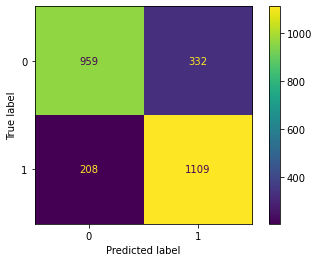

In [53]:
# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion matrix plotting
cm = confusion_matrix(y_test, catboost_pred, labels=CatBoost_clf.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CatBoost_clf.classes_)
disp.plot()
plt.show()

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, catboost_pred))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1291
           1       0.77      0.84      0.80      1317

    accuracy                           0.79      2608
   macro avg       0.80      0.79      0.79      2608
weighted avg       0.80      0.79      0.79      2608



In [55]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(catboost_pred, y_test)
print('Catboost Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, catboost_pred)))

Catboost Model accuracy score: 0.7929


In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
# creating a dict of grids
grid = dict()

# values for iteration
grid['n_estimators'] = [10, 50, 100, 500]

# values for learning rate
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

# values for the sampel
grid['subsample'] = [0.5, 0.7, 1.0]

# values for teh depth of tree
grid['max_depth'] = [3, 4, 5]

In [58]:
# applying the gridsearchcv method
grid_search = GridSearchCV(estimator=CatBoost_clf, param_grid=grid, n_jobs=-1, cv=4, scoring='accuracy')

In [59]:
grid_search.fit(X_train, y_train)

0:	learn: 0.6901366	total: 3.51ms	remaining: 1.75s
1:	learn: 0.6871791	total: 7.14ms	remaining: 1.78s
2:	learn: 0.6842945	total: 10.3ms	remaining: 1.71s
3:	learn: 0.6813055	total: 13.2ms	remaining: 1.64s
4:	learn: 0.6783472	total: 17.3ms	remaining: 1.71s
5:	learn: 0.6756627	total: 19.9ms	remaining: 1.64s
6:	learn: 0.6728719	total: 22.5ms	remaining: 1.59s
7:	learn: 0.6704832	total: 25.5ms	remaining: 1.57s
8:	learn: 0.6678154	total: 28.3ms	remaining: 1.54s
9:	learn: 0.6651817	total: 30.5ms	remaining: 1.5s
10:	learn: 0.6626315	total: 32.9ms	remaining: 1.46s
11:	learn: 0.6603083	total: 35.1ms	remaining: 1.43s
12:	learn: 0.6578112	total: 37.2ms	remaining: 1.39s
13:	learn: 0.6558993	total: 41.7ms	remaining: 1.45s
14:	learn: 0.6537223	total: 44.4ms	remaining: 1.43s
15:	learn: 0.6515290	total: 46.5ms	remaining: 1.41s
16:	learn: 0.6492617	total: 48.9ms	remaining: 1.39s
17:	learn: 0.6470239	total: 51.6ms	remaining: 1.38s
18:	learn: 0.6448016	total: 55.4ms	remaining: 1.4s
19:	learn: 0.6428925	tot

200:	learn: 0.5115883	total: 683ms	remaining: 1.02s
201:	learn: 0.5113563	total: 687ms	remaining: 1.01s
202:	learn: 0.5111377	total: 695ms	remaining: 1.02s
203:	learn: 0.5108193	total: 698ms	remaining: 1.01s
204:	learn: 0.5106150	total: 702ms	remaining: 1.01s
205:	learn: 0.5103049	total: 705ms	remaining: 1.01s
206:	learn: 0.5101184	total: 709ms	remaining: 1s
207:	learn: 0.5098888	total: 712ms	remaining: 999ms
208:	learn: 0.5097143	total: 715ms	remaining: 996ms
209:	learn: 0.5094988	total: 720ms	remaining: 994ms
210:	learn: 0.5093029	total: 722ms	remaining: 989ms
211:	learn: 0.5091531	total: 725ms	remaining: 984ms
212:	learn: 0.5088445	total: 728ms	remaining: 981ms
213:	learn: 0.5086238	total: 733ms	remaining: 980ms
214:	learn: 0.5083969	total: 736ms	remaining: 975ms
215:	learn: 0.5082019	total: 738ms	remaining: 971ms
216:	learn: 0.5080026	total: 741ms	remaining: 966ms
217:	learn: 0.5077837	total: 744ms	remaining: 962ms
218:	learn: 0.5076262	total: 747ms	remaining: 959ms
219:	learn: 0.5

400:	learn: 0.4865006	total: 1.37s	remaining: 339ms
401:	learn: 0.4864502	total: 1.38s	remaining: 336ms
402:	learn: 0.4863872	total: 1.38s	remaining: 333ms
403:	learn: 0.4863269	total: 1.39s	remaining: 329ms
404:	learn: 0.4862458	total: 1.39s	remaining: 326ms
405:	learn: 0.4861113	total: 1.39s	remaining: 322ms
406:	learn: 0.4860702	total: 1.39s	remaining: 319ms
407:	learn: 0.4860237	total: 1.4s	remaining: 315ms
408:	learn: 0.4859538	total: 1.4s	remaining: 311ms
409:	learn: 0.4858898	total: 1.4s	remaining: 307ms
410:	learn: 0.4858307	total: 1.4s	remaining: 304ms
411:	learn: 0.4858078	total: 1.41s	remaining: 301ms
412:	learn: 0.4857235	total: 1.41s	remaining: 297ms
413:	learn: 0.4856666	total: 1.41s	remaining: 293ms
414:	learn: 0.4855961	total: 1.42s	remaining: 290ms
415:	learn: 0.4855346	total: 1.42s	remaining: 286ms
416:	learn: 0.4854717	total: 1.42s	remaining: 283ms
417:	learn: 0.4854194	total: 1.42s	remaining: 279ms
418:	learn: 0.4853881	total: 1.43s	remaining: 276ms
419:	learn: 0.48

GridSearchCV(cv=4,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002472101C4F0>,
             n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [10, 50, 100, 500],
                         'subsample': [0.5, 0.7, 1.0]},
             scoring='accuracy')

In [61]:
grid_search.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}

In [62]:
y_pred_best_model = grid_search.predict(X_test)

In [63]:
print(classification_report(y_test,y_pred_best_model))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1291
           1       0.77      0.84      0.81      1317

    accuracy                           0.79      2608
   macro avg       0.80      0.79      0.79      2608
weighted avg       0.80      0.79      0.79      2608



# Multiclassifier.

In [24]:
# importing the required modules
from sklearn import datasets
import pandas as pd
import numpy as np

# loading the iris dataset
dataset = datasets.load_iris()

# converting the data to DataFrame
data = pd.DataFrame(data= np.c_[dataset['data'], dataset['target']],
                     columns= dataset['feature_names'] + ['target'])

# printing the few rows
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [25]:
data['target'].unique()

array([0., 1., 2.])

In [26]:
# splitting the dataset into input and output
Input = data.drop('target', axis=1)
Output =data['target']

# importing the module
from sklearn.model_selection import train_test_split

# splitting into testing and training parts
X_train, X_test, y_train, y_test = train_test_split(Input, Output, test_size=0.30, random_state=1)

In [27]:
# importing the CatBoot classifier
from catboost import CatBoostClassifier

# initializing the CatBoost classifier
CatBoost_clf = CatBoostClassifier()

# training the catboost classifier model
CatBoost_clf.fit(X_train, y_train)

Learning rate set to 0.070535
0:	learn: 1.0205835	total: 4ms	remaining: 3.99s
1:	learn: 0.9560460	total: 5.16ms	remaining: 2.57s
2:	learn: 0.9046150	total: 6.13ms	remaining: 2.04s
3:	learn: 0.8449988	total: 7.28ms	remaining: 1.81s
4:	learn: 0.8001300	total: 8.24ms	remaining: 1.64s
5:	learn: 0.7554011	total: 10.3ms	remaining: 1.71s
6:	learn: 0.7229773	total: 11.5ms	remaining: 1.63s
7:	learn: 0.6877542	total: 12.7ms	remaining: 1.58s
8:	learn: 0.6476980	total: 13.9ms	remaining: 1.53s
9:	learn: 0.6132941	total: 15.1ms	remaining: 1.49s
10:	learn: 0.5895860	total: 16.2ms	remaining: 1.45s
11:	learn: 0.5637373	total: 17.2ms	remaining: 1.42s
12:	learn: 0.5382809	total: 18.6ms	remaining: 1.41s
13:	learn: 0.5167550	total: 19.6ms	remaining: 1.38s
14:	learn: 0.4907701	total: 20.8ms	remaining: 1.37s
15:	learn: 0.4709261	total: 22.1ms	remaining: 1.36s
16:	learn: 0.4493609	total: 23.5ms	remaining: 1.36s
17:	learn: 0.4307453	total: 24.7ms	remaining: 1.35s
18:	learn: 0.4100723	total: 26ms	remaining: 1.3

321:	learn: 0.0178543	total: 303ms	remaining: 638ms
322:	learn: 0.0177956	total: 305ms	remaining: 638ms
323:	learn: 0.0177297	total: 306ms	remaining: 638ms
324:	learn: 0.0176659	total: 307ms	remaining: 637ms
325:	learn: 0.0176072	total: 308ms	remaining: 637ms
326:	learn: 0.0175457	total: 309ms	remaining: 636ms
327:	learn: 0.0174733	total: 310ms	remaining: 635ms
328:	learn: 0.0173966	total: 311ms	remaining: 635ms
329:	learn: 0.0173397	total: 312ms	remaining: 634ms
330:	learn: 0.0172800	total: 313ms	remaining: 634ms
331:	learn: 0.0172127	total: 315ms	remaining: 633ms
332:	learn: 0.0171554	total: 316ms	remaining: 633ms
333:	learn: 0.0171021	total: 318ms	remaining: 633ms
334:	learn: 0.0170346	total: 319ms	remaining: 634ms
335:	learn: 0.0169606	total: 321ms	remaining: 635ms
336:	learn: 0.0168900	total: 322ms	remaining: 634ms
337:	learn: 0.0168375	total: 323ms	remaining: 634ms
338:	learn: 0.0167904	total: 325ms	remaining: 634ms
339:	learn: 0.0167417	total: 326ms	remaining: 633ms
340:	learn: 

642:	learn: 0.0080968	total: 617ms	remaining: 343ms
643:	learn: 0.0080850	total: 618ms	remaining: 342ms
644:	learn: 0.0080709	total: 619ms	remaining: 341ms
645:	learn: 0.0080546	total: 620ms	remaining: 340ms
646:	learn: 0.0080424	total: 622ms	remaining: 339ms
647:	learn: 0.0080246	total: 623ms	remaining: 339ms
648:	learn: 0.0080113	total: 624ms	remaining: 337ms
649:	learn: 0.0079976	total: 625ms	remaining: 337ms
650:	learn: 0.0079863	total: 626ms	remaining: 336ms
651:	learn: 0.0079710	total: 627ms	remaining: 335ms
652:	learn: 0.0079604	total: 628ms	remaining: 334ms
653:	learn: 0.0079498	total: 629ms	remaining: 333ms
654:	learn: 0.0079375	total: 630ms	remaining: 332ms
655:	learn: 0.0079245	total: 631ms	remaining: 331ms
656:	learn: 0.0079067	total: 632ms	remaining: 330ms
657:	learn: 0.0078916	total: 633ms	remaining: 329ms
658:	learn: 0.0078797	total: 635ms	remaining: 328ms
659:	learn: 0.0078666	total: 636ms	remaining: 328ms
660:	learn: 0.0078537	total: 637ms	remaining: 327ms
661:	learn: 

889:	learn: 0.0056384	total: 916ms	remaining: 113ms
890:	learn: 0.0056305	total: 917ms	remaining: 112ms
891:	learn: 0.0056222	total: 918ms	remaining: 111ms
892:	learn: 0.0056166	total: 919ms	remaining: 110ms
893:	learn: 0.0056083	total: 920ms	remaining: 109ms
894:	learn: 0.0055995	total: 921ms	remaining: 108ms
895:	learn: 0.0055931	total: 922ms	remaining: 107ms
896:	learn: 0.0055866	total: 922ms	remaining: 106ms
897:	learn: 0.0055778	total: 923ms	remaining: 105ms
898:	learn: 0.0055713	total: 924ms	remaining: 104ms
899:	learn: 0.0055644	total: 925ms	remaining: 103ms
900:	learn: 0.0055586	total: 926ms	remaining: 102ms
901:	learn: 0.0055506	total: 927ms	remaining: 101ms
902:	learn: 0.0055439	total: 928ms	remaining: 99.7ms
903:	learn: 0.0055362	total: 928ms	remaining: 98.6ms
904:	learn: 0.0055315	total: 929ms	remaining: 97.5ms
905:	learn: 0.0055234	total: 930ms	remaining: 96.5ms
906:	learn: 0.0055166	total: 931ms	remaining: 95.4ms
907:	learn: 0.0055107	total: 932ms	remaining: 94.4ms
908:	l

In [28]:
# making predictions
catboost_pred = CatBoost_clf.predict(X_test)

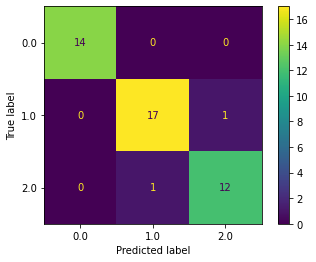

In [29]:
# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion matrix plotting
cm = confusion_matrix(y_test, catboost_pred, labels=CatBoost_clf.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CatBoost_clf.classes_)
disp.plot()
plt.show()

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, catboost_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       0.94      0.94      0.94        18
         2.0       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [31]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(catboost_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, catboost_pred)))

LightGBM Model accuracy score: 0.9556


In [4]:
#import libraries
from sklearn import datasets
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

In [5]:
# load data
cancer = datasets.load_breast_cancer()

In [6]:
# target
y = cancer.target

# features
X = cancer.data

In [7]:
#Instantiate CatBoostClassifier
cbc = CatBoostClassifier()

In [9]:
#create the grid
grid = {'max_depth': [3,4,5],'n_estimators':[100, 200, 300]}

In [10]:
#Instantiate GridSearchCV
gscv = GridSearchCV (estimator = cbc, param_grid = grid, scoring ='accuracy', cv = 5)

In [11]:
#fit the model
gscv.fit(X,y)

Learning rate set to 0.0608
0:	learn: 0.6267008	total: 148ms	remaining: 14.6s
1:	learn: 0.5341115	total: 152ms	remaining: 7.45s
2:	learn: 0.4681762	total: 156ms	remaining: 5.05s
3:	learn: 0.4265070	total: 161ms	remaining: 3.85s
4:	learn: 0.3736922	total: 165ms	remaining: 3.13s
5:	learn: 0.3384095	total: 169ms	remaining: 2.65s
6:	learn: 0.3088377	total: 174ms	remaining: 2.31s
7:	learn: 0.2758427	total: 178ms	remaining: 2.04s
8:	learn: 0.2478139	total: 182ms	remaining: 1.84s
9:	learn: 0.2221324	total: 187ms	remaining: 1.68s
10:	learn: 0.2077340	total: 195ms	remaining: 1.58s
11:	learn: 0.1897239	total: 200ms	remaining: 1.47s
12:	learn: 0.1785278	total: 204ms	remaining: 1.36s
13:	learn: 0.1661517	total: 209ms	remaining: 1.28s
14:	learn: 0.1551374	total: 213ms	remaining: 1.21s
15:	learn: 0.1441766	total: 217ms	remaining: 1.14s
16:	learn: 0.1374034	total: 221ms	remaining: 1.08s
17:	learn: 0.1299044	total: 226ms	remaining: 1.03s
18:	learn: 0.1252572	total: 230ms	remaining: 982ms
19:	learn: 0.

Learning rate set to 0.0608
0:	learn: 0.6269991	total: 4.21ms	remaining: 417ms
1:	learn: 0.5399124	total: 8.53ms	remaining: 418ms
2:	learn: 0.4770964	total: 12.8ms	remaining: 414ms
3:	learn: 0.4297263	total: 17.4ms	remaining: 417ms
4:	learn: 0.3940791	total: 21.4ms	remaining: 407ms
5:	learn: 0.3562517	total: 25.8ms	remaining: 405ms
6:	learn: 0.3252828	total: 30.1ms	remaining: 400ms
7:	learn: 0.3016742	total: 34.8ms	remaining: 400ms
8:	learn: 0.2772060	total: 39ms	remaining: 394ms
9:	learn: 0.2443629	total: 43.1ms	remaining: 388ms
10:	learn: 0.2270723	total: 47.2ms	remaining: 382ms
11:	learn: 0.2117489	total: 51.1ms	remaining: 375ms
12:	learn: 0.2018254	total: 55.4ms	remaining: 371ms
13:	learn: 0.1878473	total: 59.6ms	remaining: 366ms
14:	learn: 0.1751500	total: 63.5ms	remaining: 360ms
15:	learn: 0.1654994	total: 67.7ms	remaining: 355ms
16:	learn: 0.1589369	total: 71.7ms	remaining: 350ms
17:	learn: 0.1513032	total: 75.9ms	remaining: 346ms
18:	learn: 0.1456145	total: 80ms	remaining: 341m

74:	learn: 0.0510797	total: 198ms	remaining: 66ms
75:	learn: 0.0510264	total: 200ms	remaining: 63.2ms
76:	learn: 0.0501648	total: 202ms	remaining: 60.4ms
77:	learn: 0.0499827	total: 206ms	remaining: 58ms
78:	learn: 0.0496086	total: 208ms	remaining: 55.3ms
79:	learn: 0.0494376	total: 211ms	remaining: 52.8ms
80:	learn: 0.0489196	total: 214ms	remaining: 50.1ms
81:	learn: 0.0485865	total: 217ms	remaining: 47.6ms
82:	learn: 0.0475517	total: 219ms	remaining: 44.9ms
83:	learn: 0.0469873	total: 222ms	remaining: 42.2ms
84:	learn: 0.0463386	total: 224ms	remaining: 39.5ms
85:	learn: 0.0460680	total: 226ms	remaining: 36.7ms
86:	learn: 0.0454205	total: 228ms	remaining: 34ms
87:	learn: 0.0445968	total: 230ms	remaining: 31.4ms
88:	learn: 0.0438820	total: 232ms	remaining: 28.7ms
89:	learn: 0.0430220	total: 234ms	remaining: 26ms
90:	learn: 0.0419424	total: 236ms	remaining: 23.4ms
91:	learn: 0.0417063	total: 238ms	remaining: 20.7ms
92:	learn: 0.0411162	total: 240ms	remaining: 18ms
93:	learn: 0.0403582	t

54:	learn: 0.0933016	total: 175ms	remaining: 463ms
55:	learn: 0.0915984	total: 178ms	remaining: 457ms
56:	learn: 0.0910649	total: 180ms	remaining: 450ms
57:	learn: 0.0901122	total: 182ms	remaining: 444ms
58:	learn: 0.0890047	total: 184ms	remaining: 439ms
59:	learn: 0.0880054	total: 186ms	remaining: 433ms
60:	learn: 0.0867594	total: 188ms	remaining: 428ms
61:	learn: 0.0859854	total: 190ms	remaining: 422ms
62:	learn: 0.0851080	total: 192ms	remaining: 417ms
63:	learn: 0.0841216	total: 194ms	remaining: 413ms
64:	learn: 0.0827191	total: 197ms	remaining: 409ms
65:	learn: 0.0813974	total: 200ms	remaining: 406ms
66:	learn: 0.0805049	total: 203ms	remaining: 403ms
67:	learn: 0.0798323	total: 206ms	remaining: 399ms
68:	learn: 0.0790301	total: 209ms	remaining: 397ms
69:	learn: 0.0781640	total: 212ms	remaining: 394ms
70:	learn: 0.0775654	total: 215ms	remaining: 390ms
71:	learn: 0.0763269	total: 218ms	remaining: 388ms
72:	learn: 0.0754233	total: 222ms	remaining: 386ms
73:	learn: 0.0746427	total: 224

76:	learn: 0.0698478	total: 171ms	remaining: 273ms
77:	learn: 0.0693871	total: 173ms	remaining: 271ms
78:	learn: 0.0680696	total: 175ms	remaining: 268ms
79:	learn: 0.0674799	total: 177ms	remaining: 265ms
80:	learn: 0.0674223	total: 179ms	remaining: 263ms
81:	learn: 0.0667513	total: 181ms	remaining: 260ms
82:	learn: 0.0660713	total: 182ms	remaining: 257ms
83:	learn: 0.0655939	total: 184ms	remaining: 255ms
84:	learn: 0.0648949	total: 187ms	remaining: 252ms
85:	learn: 0.0640520	total: 189ms	remaining: 250ms
86:	learn: 0.0634034	total: 191ms	remaining: 248ms
87:	learn: 0.0629408	total: 193ms	remaining: 245ms
88:	learn: 0.0621337	total: 195ms	remaining: 243ms
89:	learn: 0.0619678	total: 198ms	remaining: 242ms
90:	learn: 0.0617589	total: 200ms	remaining: 240ms
91:	learn: 0.0614053	total: 203ms	remaining: 238ms
92:	learn: 0.0609641	total: 205ms	remaining: 236ms
93:	learn: 0.0603725	total: 207ms	remaining: 234ms
94:	learn: 0.0598734	total: 210ms	remaining: 232ms
95:	learn: 0.0594056	total: 212

78:	learn: 0.0849297	total: 239ms	remaining: 367ms
79:	learn: 0.0843066	total: 242ms	remaining: 363ms
80:	learn: 0.0842444	total: 245ms	remaining: 360ms
81:	learn: 0.0836240	total: 248ms	remaining: 356ms
82:	learn: 0.0831684	total: 250ms	remaining: 352ms
83:	learn: 0.0820897	total: 252ms	remaining: 349ms
84:	learn: 0.0813827	total: 255ms	remaining: 345ms
85:	learn: 0.0808887	total: 258ms	remaining: 342ms
86:	learn: 0.0804863	total: 261ms	remaining: 339ms
87:	learn: 0.0798977	total: 263ms	remaining: 335ms
88:	learn: 0.0790992	total: 265ms	remaining: 331ms
89:	learn: 0.0781552	total: 267ms	remaining: 327ms
90:	learn: 0.0774010	total: 269ms	remaining: 323ms
91:	learn: 0.0763927	total: 271ms	remaining: 318ms
92:	learn: 0.0760520	total: 273ms	remaining: 314ms
93:	learn: 0.0754542	total: 275ms	remaining: 310ms
94:	learn: 0.0748080	total: 277ms	remaining: 306ms
95:	learn: 0.0743604	total: 278ms	remaining: 301ms
96:	learn: 0.0739587	total: 280ms	remaining: 297ms
97:	learn: 0.0735374	total: 282

85:	learn: 0.0720437	total: 259ms	remaining: 343ms
86:	learn: 0.0713341	total: 261ms	remaining: 339ms
87:	learn: 0.0707713	total: 264ms	remaining: 336ms
88:	learn: 0.0699164	total: 266ms	remaining: 332ms
89:	learn: 0.0695013	total: 269ms	remaining: 329ms
90:	learn: 0.0685842	total: 271ms	remaining: 325ms
91:	learn: 0.0683202	total: 274ms	remaining: 321ms
92:	learn: 0.0675944	total: 276ms	remaining: 318ms
93:	learn: 0.0672262	total: 279ms	remaining: 314ms
94:	learn: 0.0669272	total: 281ms	remaining: 310ms
95:	learn: 0.0668147	total: 282ms	remaining: 306ms
96:	learn: 0.0661350	total: 284ms	remaining: 301ms
97:	learn: 0.0654450	total: 286ms	remaining: 297ms
98:	learn: 0.0649210	total: 288ms	remaining: 293ms
99:	learn: 0.0639500	total: 289ms	remaining: 289ms
100:	learn: 0.0630154	total: 291ms	remaining: 285ms
101:	learn: 0.0623630	total: 293ms	remaining: 282ms
102:	learn: 0.0618231	total: 295ms	remaining: 278ms
103:	learn: 0.0611118	total: 297ms	remaining: 274ms
104:	learn: 0.0602042	total

76:	learn: 0.0813063	total: 231ms	remaining: 370ms
77:	learn: 0.0812303	total: 233ms	remaining: 365ms
78:	learn: 0.0810463	total: 235ms	remaining: 361ms
79:	learn: 0.0808859	total: 237ms	remaining: 356ms
80:	learn: 0.0807966	total: 240ms	remaining: 352ms
81:	learn: 0.0795111	total: 242ms	remaining: 348ms
82:	learn: 0.0792211	total: 244ms	remaining: 344ms
83:	learn: 0.0788249	total: 246ms	remaining: 340ms
84:	learn: 0.0781916	total: 249ms	remaining: 337ms
85:	learn: 0.0778935	total: 251ms	remaining: 333ms
86:	learn: 0.0772497	total: 255ms	remaining: 331ms
87:	learn: 0.0766317	total: 257ms	remaining: 327ms
88:	learn: 0.0759684	total: 259ms	remaining: 324ms
89:	learn: 0.0753499	total: 262ms	remaining: 320ms
90:	learn: 0.0749406	total: 263ms	remaining: 316ms
91:	learn: 0.0744499	total: 265ms	remaining: 311ms
92:	learn: 0.0738148	total: 267ms	remaining: 308ms
93:	learn: 0.0725654	total: 270ms	remaining: 304ms
94:	learn: 0.0718180	total: 272ms	remaining: 300ms
95:	learn: 0.0715310	total: 274

91:	learn: 0.0830055	total: 226ms	remaining: 511ms
92:	learn: 0.0825635	total: 228ms	remaining: 508ms
93:	learn: 0.0813644	total: 230ms	remaining: 504ms
94:	learn: 0.0806314	total: 232ms	remaining: 501ms
95:	learn: 0.0802449	total: 234ms	remaining: 498ms
96:	learn: 0.0797916	total: 236ms	remaining: 495ms
97:	learn: 0.0792491	total: 238ms	remaining: 491ms
98:	learn: 0.0784090	total: 241ms	remaining: 488ms
99:	learn: 0.0776620	total: 243ms	remaining: 486ms
100:	learn: 0.0770495	total: 246ms	remaining: 484ms
101:	learn: 0.0766383	total: 248ms	remaining: 482ms
102:	learn: 0.0762358	total: 251ms	remaining: 479ms
103:	learn: 0.0755310	total: 253ms	remaining: 476ms
104:	learn: 0.0751956	total: 254ms	remaining: 472ms
105:	learn: 0.0749242	total: 257ms	remaining: 470ms
106:	learn: 0.0743265	total: 259ms	remaining: 467ms
107:	learn: 0.0735991	total: 261ms	remaining: 464ms
108:	learn: 0.0732397	total: 262ms	remaining: 460ms
109:	learn: 0.0726104	total: 264ms	remaining: 456ms
110:	learn: 0.0720844

273:	learn: 0.0317944	total: 570ms	remaining: 54.1ms
274:	learn: 0.0316032	total: 573ms	remaining: 52.1ms
275:	learn: 0.0314326	total: 575ms	remaining: 50ms
276:	learn: 0.0312695	total: 577ms	remaining: 47.9ms
277:	learn: 0.0311709	total: 579ms	remaining: 45.8ms
278:	learn: 0.0310280	total: 581ms	remaining: 43.8ms
279:	learn: 0.0308933	total: 584ms	remaining: 41.7ms
280:	learn: 0.0308755	total: 586ms	remaining: 39.6ms
281:	learn: 0.0307812	total: 589ms	remaining: 37.6ms
282:	learn: 0.0307025	total: 591ms	remaining: 35.5ms
283:	learn: 0.0305236	total: 593ms	remaining: 33.4ms
284:	learn: 0.0304322	total: 595ms	remaining: 31.3ms
285:	learn: 0.0302494	total: 597ms	remaining: 29.2ms
286:	learn: 0.0301713	total: 599ms	remaining: 27.1ms
287:	learn: 0.0300699	total: 600ms	remaining: 25ms
288:	learn: 0.0299947	total: 602ms	remaining: 22.9ms
289:	learn: 0.0299355	total: 604ms	remaining: 20.8ms
290:	learn: 0.0298352	total: 606ms	remaining: 18.7ms
291:	learn: 0.0297541	total: 608ms	remaining: 16.7

197:	learn: 0.0429058	total: 419ms	remaining: 216ms
198:	learn: 0.0427667	total: 421ms	remaining: 214ms
199:	learn: 0.0423932	total: 423ms	remaining: 212ms
200:	learn: 0.0421837	total: 425ms	remaining: 209ms
201:	learn: 0.0421012	total: 427ms	remaining: 207ms
202:	learn: 0.0419243	total: 429ms	remaining: 205ms
203:	learn: 0.0416601	total: 431ms	remaining: 203ms
204:	learn: 0.0414196	total: 433ms	remaining: 201ms
205:	learn: 0.0413058	total: 436ms	remaining: 199ms
206:	learn: 0.0410019	total: 438ms	remaining: 197ms
207:	learn: 0.0409159	total: 441ms	remaining: 195ms
208:	learn: 0.0406665	total: 443ms	remaining: 193ms
209:	learn: 0.0403122	total: 446ms	remaining: 191ms
210:	learn: 0.0400297	total: 448ms	remaining: 189ms
211:	learn: 0.0397456	total: 450ms	remaining: 187ms
212:	learn: 0.0392168	total: 452ms	remaining: 184ms
213:	learn: 0.0390905	total: 454ms	remaining: 182ms
214:	learn: 0.0388158	total: 456ms	remaining: 180ms
215:	learn: 0.0385347	total: 458ms	remaining: 178ms
216:	learn: 

76:	learn: 0.1105014	total: 247ms	remaining: 715ms
77:	learn: 0.1100482	total: 249ms	remaining: 710ms
78:	learn: 0.1088594	total: 251ms	remaining: 703ms
79:	learn: 0.1082062	total: 254ms	remaining: 699ms
80:	learn: 0.1071894	total: 257ms	remaining: 694ms
81:	learn: 0.1063731	total: 260ms	remaining: 690ms
82:	learn: 0.1060559	total: 262ms	remaining: 685ms
83:	learn: 0.1048782	total: 264ms	remaining: 680ms
84:	learn: 0.1041268	total: 267ms	remaining: 674ms
85:	learn: 0.1035930	total: 270ms	remaining: 673ms
86:	learn: 0.1032307	total: 274ms	remaining: 672ms
87:	learn: 0.1025261	total: 277ms	remaining: 668ms
88:	learn: 0.1017043	total: 280ms	remaining: 663ms
89:	learn: 0.1013513	total: 282ms	remaining: 657ms
90:	learn: 0.1006470	total: 285ms	remaining: 655ms
91:	learn: 0.1003508	total: 287ms	remaining: 650ms
92:	learn: 0.0996064	total: 289ms	remaining: 644ms
93:	learn: 0.0987962	total: 291ms	remaining: 638ms
94:	learn: 0.0983461	total: 293ms	remaining: 632ms
95:	learn: 0.0981935	total: 295

0:	learn: 0.6593186	total: 3.11ms	remaining: 930ms
1:	learn: 0.6242800	total: 6.88ms	remaining: 1.02s
2:	learn: 0.5905948	total: 10.3ms	remaining: 1.01s
3:	learn: 0.5578317	total: 13ms	remaining: 960ms
4:	learn: 0.5362711	total: 16.2ms	remaining: 955ms
5:	learn: 0.5140862	total: 18.8ms	remaining: 922ms
6:	learn: 0.4904814	total: 21.7ms	remaining: 909ms
7:	learn: 0.4723659	total: 24.2ms	remaining: 882ms
8:	learn: 0.4472853	total: 27.1ms	remaining: 877ms
9:	learn: 0.4293611	total: 29.8ms	remaining: 865ms
10:	learn: 0.4128460	total: 32ms	remaining: 840ms
11:	learn: 0.3962865	total: 34.8ms	remaining: 835ms
12:	learn: 0.3835855	total: 37.4ms	remaining: 825ms
13:	learn: 0.3664891	total: 39.8ms	remaining: 812ms
14:	learn: 0.3498445	total: 42ms	remaining: 798ms
15:	learn: 0.3378746	total: 43.9ms	remaining: 779ms
16:	learn: 0.3241437	total: 46.3ms	remaining: 770ms
17:	learn: 0.3108568	total: 48.3ms	remaining: 757ms
18:	learn: 0.2998581	total: 50.5ms	remaining: 746ms
19:	learn: 0.2912676	total: 

160:	learn: 0.0580274	total: 341ms	remaining: 294ms
161:	learn: 0.0578435	total: 343ms	remaining: 293ms
162:	learn: 0.0575010	total: 345ms	remaining: 290ms
163:	learn: 0.0570779	total: 348ms	remaining: 288ms
164:	learn: 0.0565972	total: 350ms	remaining: 286ms
165:	learn: 0.0562229	total: 352ms	remaining: 284ms
166:	learn: 0.0560148	total: 354ms	remaining: 282ms
167:	learn: 0.0557767	total: 357ms	remaining: 280ms
168:	learn: 0.0557505	total: 359ms	remaining: 278ms
169:	learn: 0.0551848	total: 362ms	remaining: 277ms
170:	learn: 0.0548765	total: 365ms	remaining: 275ms
171:	learn: 0.0548351	total: 368ms	remaining: 274ms
172:	learn: 0.0547771	total: 370ms	remaining: 271ms
173:	learn: 0.0541353	total: 372ms	remaining: 269ms
174:	learn: 0.0541039	total: 374ms	remaining: 267ms
175:	learn: 0.0539178	total: 376ms	remaining: 265ms
176:	learn: 0.0537155	total: 378ms	remaining: 263ms
177:	learn: 0.0532786	total: 380ms	remaining: 260ms
178:	learn: 0.0529991	total: 382ms	remaining: 258ms
179:	learn: 

77:	learn: 0.1110213	total: 180ms	remaining: 513ms
78:	learn: 0.1094278	total: 183ms	remaining: 511ms
79:	learn: 0.1085685	total: 185ms	remaining: 507ms
80:	learn: 0.1069741	total: 186ms	remaining: 504ms
81:	learn: 0.1059577	total: 188ms	remaining: 500ms
82:	learn: 0.1044491	total: 191ms	remaining: 498ms
83:	learn: 0.1032506	total: 192ms	remaining: 495ms
84:	learn: 0.1024893	total: 194ms	remaining: 491ms
85:	learn: 0.1014128	total: 196ms	remaining: 489ms
86:	learn: 0.1002958	total: 199ms	remaining: 487ms
87:	learn: 0.0997256	total: 201ms	remaining: 485ms
88:	learn: 0.0988198	total: 204ms	remaining: 484ms
89:	learn: 0.0977935	total: 206ms	remaining: 482ms
90:	learn: 0.0973723	total: 209ms	remaining: 479ms
91:	learn: 0.0968779	total: 211ms	remaining: 477ms
92:	learn: 0.0961253	total: 213ms	remaining: 475ms
93:	learn: 0.0948056	total: 215ms	remaining: 472ms
94:	learn: 0.0939273	total: 218ms	remaining: 469ms
95:	learn: 0.0937913	total: 220ms	remaining: 467ms
96:	learn: 0.0932472	total: 222

240:	learn: 0.0437528	total: 521ms	remaining: 128ms
241:	learn: 0.0434285	total: 523ms	remaining: 125ms
242:	learn: 0.0434043	total: 526ms	remaining: 123ms
243:	learn: 0.0431563	total: 528ms	remaining: 121ms
244:	learn: 0.0429324	total: 531ms	remaining: 119ms
245:	learn: 0.0427556	total: 533ms	remaining: 117ms
246:	learn: 0.0424767	total: 536ms	remaining: 115ms
247:	learn: 0.0421063	total: 539ms	remaining: 113ms
248:	learn: 0.0420098	total: 542ms	remaining: 111ms
249:	learn: 0.0417908	total: 545ms	remaining: 109ms
250:	learn: 0.0417447	total: 548ms	remaining: 107ms
251:	learn: 0.0417143	total: 551ms	remaining: 105ms
252:	learn: 0.0416308	total: 553ms	remaining: 103ms
253:	learn: 0.0415012	total: 556ms	remaining: 101ms
254:	learn: 0.0413378	total: 558ms	remaining: 98.5ms
255:	learn: 0.0411725	total: 561ms	remaining: 96.5ms
256:	learn: 0.0410028	total: 564ms	remaining: 94.3ms
257:	learn: 0.0406978	total: 566ms	remaining: 92.2ms
258:	learn: 0.0405274	total: 569ms	remaining: 90.1ms
259:	le

5:	learn: 0.3231025	total: 15.4ms	remaining: 241ms
6:	learn: 0.2847793	total: 18.3ms	remaining: 243ms
7:	learn: 0.2593173	total: 22ms	remaining: 253ms
8:	learn: 0.2389266	total: 26ms	remaining: 263ms
9:	learn: 0.2224999	total: 28.9ms	remaining: 260ms
10:	learn: 0.2006087	total: 32.2ms	remaining: 261ms
11:	learn: 0.1876402	total: 36.9ms	remaining: 271ms
12:	learn: 0.1747839	total: 42ms	remaining: 281ms
13:	learn: 0.1594654	total: 45ms	remaining: 276ms
14:	learn: 0.1494353	total: 48.7ms	remaining: 276ms
15:	learn: 0.1389305	total: 51.9ms	remaining: 272ms
16:	learn: 0.1267715	total: 55.6ms	remaining: 271ms
17:	learn: 0.1187158	total: 58.3ms	remaining: 266ms
18:	learn: 0.1109923	total: 60.9ms	remaining: 260ms
19:	learn: 0.1059572	total: 63.7ms	remaining: 255ms
20:	learn: 0.1031134	total: 66.7ms	remaining: 251ms
21:	learn: 0.0980827	total: 70.2ms	remaining: 249ms
22:	learn: 0.0952918	total: 73.2ms	remaining: 245ms
23:	learn: 0.0916226	total: 75.9ms	remaining: 240ms
24:	learn: 0.0866255	tota

8:	learn: 0.2515665	total: 25.8ms	remaining: 261ms
9:	learn: 0.2273109	total: 30ms	remaining: 270ms
10:	learn: 0.2036315	total: 34.4ms	remaining: 278ms
11:	learn: 0.1898907	total: 38.3ms	remaining: 281ms
12:	learn: 0.1755511	total: 42.5ms	remaining: 284ms
13:	learn: 0.1663087	total: 45.4ms	remaining: 279ms
14:	learn: 0.1585524	total: 48.7ms	remaining: 276ms
15:	learn: 0.1469035	total: 52.4ms	remaining: 275ms
16:	learn: 0.1379691	total: 56.1ms	remaining: 274ms
17:	learn: 0.1331419	total: 60ms	remaining: 273ms
18:	learn: 0.1262509	total: 63.6ms	remaining: 271ms
19:	learn: 0.1222729	total: 67.1ms	remaining: 268ms
20:	learn: 0.1161761	total: 70.3ms	remaining: 264ms
21:	learn: 0.1087388	total: 73.5ms	remaining: 261ms
22:	learn: 0.1058761	total: 76.8ms	remaining: 257ms
23:	learn: 0.1014047	total: 79.9ms	remaining: 253ms
24:	learn: 0.0973731	total: 82.9ms	remaining: 249ms
25:	learn: 0.0933123	total: 85.8ms	remaining: 244ms
26:	learn: 0.0885563	total: 88.6ms	remaining: 240ms
27:	learn: 0.08559

73:	learn: 0.0356009	total: 222ms	remaining: 78.1ms
74:	learn: 0.0348208	total: 225ms	remaining: 75ms
75:	learn: 0.0343096	total: 228ms	remaining: 71.9ms
76:	learn: 0.0337592	total: 230ms	remaining: 68.8ms
77:	learn: 0.0333127	total: 233ms	remaining: 65.7ms
78:	learn: 0.0329467	total: 236ms	remaining: 62.8ms
79:	learn: 0.0328841	total: 240ms	remaining: 59.9ms
80:	learn: 0.0327411	total: 243ms	remaining: 57ms
81:	learn: 0.0321055	total: 246ms	remaining: 54ms
82:	learn: 0.0313254	total: 248ms	remaining: 50.9ms
83:	learn: 0.0306586	total: 251ms	remaining: 47.8ms
84:	learn: 0.0304996	total: 253ms	remaining: 44.7ms
85:	learn: 0.0297124	total: 256ms	remaining: 41.7ms
86:	learn: 0.0296074	total: 259ms	remaining: 38.7ms
87:	learn: 0.0290296	total: 262ms	remaining: 35.7ms
88:	learn: 0.0287130	total: 264ms	remaining: 32.7ms
89:	learn: 0.0281258	total: 267ms	remaining: 29.7ms
90:	learn: 0.0280862	total: 270ms	remaining: 26.7ms
91:	learn: 0.0278419	total: 273ms	remaining: 23.8ms
92:	learn: 0.02757

135:	learn: 0.0305988	total: 405ms	remaining: 191ms
136:	learn: 0.0302911	total: 408ms	remaining: 188ms
137:	learn: 0.0299805	total: 411ms	remaining: 185ms
138:	learn: 0.0298042	total: 414ms	remaining: 182ms
139:	learn: 0.0294352	total: 417ms	remaining: 179ms
140:	learn: 0.0293315	total: 420ms	remaining: 176ms
141:	learn: 0.0291010	total: 423ms	remaining: 173ms
142:	learn: 0.0288660	total: 426ms	remaining: 170ms
143:	learn: 0.0285412	total: 430ms	remaining: 167ms
144:	learn: 0.0282801	total: 433ms	remaining: 164ms
145:	learn: 0.0280318	total: 436ms	remaining: 161ms
146:	learn: 0.0279152	total: 439ms	remaining: 158ms
147:	learn: 0.0277044	total: 441ms	remaining: 155ms
148:	learn: 0.0272728	total: 445ms	remaining: 152ms
149:	learn: 0.0270104	total: 448ms	remaining: 149ms
150:	learn: 0.0268450	total: 451ms	remaining: 146ms
151:	learn: 0.0266087	total: 454ms	remaining: 143ms
152:	learn: 0.0265993	total: 456ms	remaining: 140ms
153:	learn: 0.0264636	total: 459ms	remaining: 137ms
154:	learn: 

100:	learn: 0.0421836	total: 302ms	remaining: 296ms
101:	learn: 0.0417169	total: 304ms	remaining: 292ms
102:	learn: 0.0414257	total: 307ms	remaining: 289ms
103:	learn: 0.0407741	total: 309ms	remaining: 286ms
104:	learn: 0.0404218	total: 312ms	remaining: 282ms
105:	learn: 0.0400379	total: 315ms	remaining: 279ms
106:	learn: 0.0395329	total: 318ms	remaining: 276ms
107:	learn: 0.0391665	total: 321ms	remaining: 274ms
108:	learn: 0.0385678	total: 324ms	remaining: 270ms
109:	learn: 0.0382423	total: 327ms	remaining: 268ms
110:	learn: 0.0380798	total: 331ms	remaining: 265ms
111:	learn: 0.0377286	total: 333ms	remaining: 262ms
112:	learn: 0.0372916	total: 336ms	remaining: 259ms
113:	learn: 0.0370237	total: 338ms	remaining: 255ms
114:	learn: 0.0367624	total: 341ms	remaining: 252ms
115:	learn: 0.0365460	total: 344ms	remaining: 249ms
116:	learn: 0.0361395	total: 347ms	remaining: 246ms
117:	learn: 0.0356784	total: 350ms	remaining: 243ms
118:	learn: 0.0353757	total: 353ms	remaining: 240ms
119:	learn: 

60:	learn: 0.0821737	total: 193ms	remaining: 441ms
61:	learn: 0.0808399	total: 196ms	remaining: 437ms
62:	learn: 0.0795755	total: 200ms	remaining: 434ms
63:	learn: 0.0780421	total: 203ms	remaining: 430ms
64:	learn: 0.0764275	total: 206ms	remaining: 427ms
65:	learn: 0.0754562	total: 209ms	remaining: 424ms
66:	learn: 0.0751237	total: 213ms	remaining: 422ms
67:	learn: 0.0741792	total: 216ms	remaining: 420ms
68:	learn: 0.0729106	total: 220ms	remaining: 417ms
69:	learn: 0.0722600	total: 223ms	remaining: 413ms
70:	learn: 0.0714022	total: 225ms	remaining: 410ms
71:	learn: 0.0705646	total: 229ms	remaining: 407ms
72:	learn: 0.0698570	total: 232ms	remaining: 403ms
73:	learn: 0.0694192	total: 234ms	remaining: 399ms
74:	learn: 0.0684656	total: 237ms	remaining: 396ms
75:	learn: 0.0676209	total: 240ms	remaining: 392ms
76:	learn: 0.0670585	total: 243ms	remaining: 388ms
77:	learn: 0.0661718	total: 245ms	remaining: 384ms
78:	learn: 0.0658766	total: 248ms	remaining: 380ms
79:	learn: 0.0653204	total: 251

22:	learn: 0.1909389	total: 76.1ms	remaining: 585ms
23:	learn: 0.1834375	total: 78.8ms	remaining: 578ms
24:	learn: 0.1745039	total: 81.9ms	remaining: 573ms
25:	learn: 0.1654735	total: 84.7ms	remaining: 567ms
26:	learn: 0.1585056	total: 87.9ms	remaining: 563ms
27:	learn: 0.1537222	total: 91.2ms	remaining: 561ms
28:	learn: 0.1496130	total: 94.9ms	remaining: 560ms
29:	learn: 0.1430299	total: 98.9ms	remaining: 560ms
30:	learn: 0.1386498	total: 102ms	remaining: 558ms
31:	learn: 0.1357730	total: 106ms	remaining: 555ms
32:	learn: 0.1316219	total: 109ms	remaining: 550ms
33:	learn: 0.1291695	total: 112ms	remaining: 545ms
34:	learn: 0.1250717	total: 114ms	remaining: 540ms
35:	learn: 0.1218920	total: 117ms	remaining: 535ms
36:	learn: 0.1194613	total: 121ms	remaining: 533ms
37:	learn: 0.1165508	total: 124ms	remaining: 529ms
38:	learn: 0.1131185	total: 127ms	remaining: 526ms
39:	learn: 0.1112053	total: 131ms	remaining: 523ms
40:	learn: 0.1087462	total: 134ms	remaining: 521ms
41:	learn: 0.1069273	to

Learning rate set to 0.032231
0:	learn: 0.6449114	total: 12ms	remaining: 2.38s
1:	learn: 0.5976554	total: 16.7ms	remaining: 1.65s
2:	learn: 0.5553791	total: 21.4ms	remaining: 1.41s
3:	learn: 0.5287992	total: 26.1ms	remaining: 1.28s
4:	learn: 0.5002253	total: 30.3ms	remaining: 1.18s
5:	learn: 0.4707394	total: 34.3ms	remaining: 1.11s
6:	learn: 0.4376988	total: 37.6ms	remaining: 1.03s
7:	learn: 0.4143755	total: 41.8ms	remaining: 1s
8:	learn: 0.3938821	total: 45.5ms	remaining: 966ms
9:	learn: 0.3674952	total: 49.1ms	remaining: 934ms
10:	learn: 0.3424806	total: 52.5ms	remaining: 902ms
11:	learn: 0.3237156	total: 56.1ms	remaining: 879ms
12:	learn: 0.3064138	total: 59.5ms	remaining: 857ms
13:	learn: 0.2924910	total: 63.3ms	remaining: 842ms
14:	learn: 0.2813917	total: 67.2ms	remaining: 829ms
15:	learn: 0.2662909	total: 70.8ms	remaining: 814ms
16:	learn: 0.2528368	total: 74.5ms	remaining: 802ms
17:	learn: 0.2432514	total: 77.8ms	remaining: 787ms
18:	learn: 0.2317786	total: 81.8ms	remaining: 779

159:	learn: 0.0293898	total: 514ms	remaining: 128ms
160:	learn: 0.0291035	total: 517ms	remaining: 125ms
161:	learn: 0.0288203	total: 519ms	remaining: 122ms
162:	learn: 0.0285553	total: 522ms	remaining: 119ms
163:	learn: 0.0283741	total: 525ms	remaining: 115ms
164:	learn: 0.0282947	total: 528ms	remaining: 112ms
165:	learn: 0.0279965	total: 531ms	remaining: 109ms
166:	learn: 0.0277074	total: 535ms	remaining: 106ms
167:	learn: 0.0273387	total: 538ms	remaining: 102ms
168:	learn: 0.0270709	total: 541ms	remaining: 99.3ms
169:	learn: 0.0267949	total: 545ms	remaining: 96.2ms
170:	learn: 0.0263507	total: 548ms	remaining: 92.9ms
171:	learn: 0.0261027	total: 550ms	remaining: 89.6ms
172:	learn: 0.0260216	total: 553ms	remaining: 86.3ms
173:	learn: 0.0258140	total: 557ms	remaining: 83.2ms
174:	learn: 0.0255277	total: 560ms	remaining: 80ms
175:	learn: 0.0254176	total: 563ms	remaining: 76.7ms
176:	learn: 0.0252494	total: 565ms	remaining: 73.5ms
177:	learn: 0.0252274	total: 568ms	remaining: 70.2ms
178:

161:	learn: 0.0374355	total: 541ms	remaining: 461ms
162:	learn: 0.0372139	total: 544ms	remaining: 458ms
163:	learn: 0.0368622	total: 547ms	remaining: 454ms
164:	learn: 0.0365865	total: 550ms	remaining: 450ms
165:	learn: 0.0364276	total: 554ms	remaining: 447ms
166:	learn: 0.0363123	total: 557ms	remaining: 443ms
167:	learn: 0.0360940	total: 561ms	remaining: 440ms
168:	learn: 0.0357864	total: 564ms	remaining: 437ms
169:	learn: 0.0355768	total: 568ms	remaining: 434ms
170:	learn: 0.0353366	total: 571ms	remaining: 431ms
171:	learn: 0.0351139	total: 574ms	remaining: 427ms
172:	learn: 0.0349764	total: 577ms	remaining: 424ms
173:	learn: 0.0349043	total: 580ms	remaining: 420ms
174:	learn: 0.0347532	total: 582ms	remaining: 416ms
175:	learn: 0.0346012	total: 585ms	remaining: 412ms
176:	learn: 0.0343749	total: 588ms	remaining: 409ms
177:	learn: 0.0342142	total: 591ms	remaining: 405ms
178:	learn: 0.0340581	total: 594ms	remaining: 401ms
179:	learn: 0.0339222	total: 596ms	remaining: 398ms
180:	learn: 

63:	learn: 0.0938062	total: 273ms	remaining: 1.01s
64:	learn: 0.0924076	total: 276ms	remaining: 999ms
65:	learn: 0.0903609	total: 280ms	remaining: 993ms
66:	learn: 0.0888281	total: 283ms	remaining: 986ms
67:	learn: 0.0871558	total: 287ms	remaining: 978ms
68:	learn: 0.0856569	total: 290ms	remaining: 971ms
69:	learn: 0.0845268	total: 293ms	remaining: 964ms
70:	learn: 0.0832294	total: 297ms	remaining: 957ms
71:	learn: 0.0823108	total: 299ms	remaining: 948ms
72:	learn: 0.0811431	total: 302ms	remaining: 938ms
73:	learn: 0.0802630	total: 304ms	remaining: 930ms
74:	learn: 0.0794231	total: 307ms	remaining: 922ms
75:	learn: 0.0777309	total: 310ms	remaining: 913ms
76:	learn: 0.0769430	total: 312ms	remaining: 905ms
77:	learn: 0.0760942	total: 315ms	remaining: 897ms
78:	learn: 0.0754064	total: 318ms	remaining: 889ms
79:	learn: 0.0748837	total: 321ms	remaining: 882ms
80:	learn: 0.0742764	total: 323ms	remaining: 874ms
81:	learn: 0.0730701	total: 326ms	remaining: 867ms
82:	learn: 0.0725639	total: 329

258:	learn: 0.0225400	total: 796ms	remaining: 126ms
259:	learn: 0.0224022	total: 799ms	remaining: 123ms
260:	learn: 0.0223689	total: 801ms	remaining: 120ms
261:	learn: 0.0222391	total: 804ms	remaining: 117ms
262:	learn: 0.0220846	total: 807ms	remaining: 114ms
263:	learn: 0.0219041	total: 810ms	remaining: 110ms
264:	learn: 0.0218477	total: 815ms	remaining: 108ms
265:	learn: 0.0218059	total: 818ms	remaining: 105ms
266:	learn: 0.0216814	total: 821ms	remaining: 101ms
267:	learn: 0.0214971	total: 823ms	remaining: 98.3ms
268:	learn: 0.0214629	total: 826ms	remaining: 95.1ms
269:	learn: 0.0213280	total: 828ms	remaining: 92ms
270:	learn: 0.0212789	total: 831ms	remaining: 88.9ms
271:	learn: 0.0212067	total: 833ms	remaining: 85.8ms
272:	learn: 0.0211342	total: 836ms	remaining: 82.7ms
273:	learn: 0.0209961	total: 838ms	remaining: 79.5ms
274:	learn: 0.0209517	total: 841ms	remaining: 76.4ms
275:	learn: 0.0209027	total: 843ms	remaining: 73.3ms
276:	learn: 0.0208359	total: 847ms	remaining: 70.3ms
277:

169:	learn: 0.0453504	total: 560ms	remaining: 428ms
170:	learn: 0.0451775	total: 563ms	remaining: 425ms
171:	learn: 0.0448249	total: 566ms	remaining: 421ms
172:	learn: 0.0445394	total: 569ms	remaining: 418ms
173:	learn: 0.0442587	total: 572ms	remaining: 414ms
174:	learn: 0.0440405	total: 575ms	remaining: 411ms
175:	learn: 0.0438199	total: 579ms	remaining: 408ms
176:	learn: 0.0435352	total: 582ms	remaining: 405ms
177:	learn: 0.0433015	total: 585ms	remaining: 401ms
178:	learn: 0.0431066	total: 587ms	remaining: 397ms
179:	learn: 0.0428126	total: 590ms	remaining: 393ms
180:	learn: 0.0424613	total: 593ms	remaining: 390ms
181:	learn: 0.0421877	total: 596ms	remaining: 386ms
182:	learn: 0.0418770	total: 598ms	remaining: 382ms
183:	learn: 0.0415311	total: 601ms	remaining: 379ms
184:	learn: 0.0413418	total: 603ms	remaining: 375ms
185:	learn: 0.0412362	total: 606ms	remaining: 372ms
186:	learn: 0.0410186	total: 609ms	remaining: 368ms
187:	learn: 0.0407376	total: 612ms	remaining: 364ms
188:	learn: 

45:	learn: 0.1376570	total: 173ms	remaining: 956ms
46:	learn: 0.1344805	total: 177ms	remaining: 953ms
47:	learn: 0.1329437	total: 180ms	remaining: 946ms
48:	learn: 0.1296982	total: 184ms	remaining: 942ms
49:	learn: 0.1265698	total: 188ms	remaining: 939ms
50:	learn: 0.1237224	total: 191ms	remaining: 933ms
51:	learn: 0.1206863	total: 195ms	remaining: 931ms
52:	learn: 0.1187735	total: 200ms	remaining: 931ms
53:	learn: 0.1171460	total: 204ms	remaining: 929ms
54:	learn: 0.1153004	total: 207ms	remaining: 921ms
55:	learn: 0.1124664	total: 210ms	remaining: 914ms
56:	learn: 0.1108384	total: 215ms	remaining: 915ms
57:	learn: 0.1082024	total: 218ms	remaining: 910ms
58:	learn: 0.1063501	total: 221ms	remaining: 903ms
59:	learn: 0.1048309	total: 224ms	remaining: 897ms
60:	learn: 0.1033587	total: 228ms	remaining: 893ms
61:	learn: 0.1012298	total: 232ms	remaining: 890ms
62:	learn: 0.0999788	total: 235ms	remaining: 884ms
63:	learn: 0.0984426	total: 238ms	remaining: 878ms
64:	learn: 0.0972819	total: 241

237:	learn: 0.0276288	total: 874ms	remaining: 228ms
238:	learn: 0.0275506	total: 877ms	remaining: 224ms
239:	learn: 0.0274208	total: 881ms	remaining: 220ms
240:	learn: 0.0272344	total: 885ms	remaining: 217ms
241:	learn: 0.0270815	total: 889ms	remaining: 213ms
242:	learn: 0.0270670	total: 892ms	remaining: 209ms
243:	learn: 0.0269782	total: 896ms	remaining: 206ms
244:	learn: 0.0268259	total: 900ms	remaining: 202ms
245:	learn: 0.0266826	total: 905ms	remaining: 199ms
246:	learn: 0.0266331	total: 908ms	remaining: 195ms
247:	learn: 0.0264769	total: 911ms	remaining: 191ms
248:	learn: 0.0263673	total: 914ms	remaining: 187ms
249:	learn: 0.0263481	total: 919ms	remaining: 184ms
250:	learn: 0.0262113	total: 922ms	remaining: 180ms
251:	learn: 0.0260781	total: 925ms	remaining: 176ms
252:	learn: 0.0259676	total: 928ms	remaining: 172ms
253:	learn: 0.0257447	total: 931ms	remaining: 169ms
254:	learn: 0.0255830	total: 936ms	remaining: 165ms
255:	learn: 0.0255119	total: 939ms	remaining: 161ms
256:	learn: 

141:	learn: 0.0507626	total: 432ms	remaining: 480ms
142:	learn: 0.0502914	total: 434ms	remaining: 477ms
143:	learn: 0.0498836	total: 437ms	remaining: 474ms
144:	learn: 0.0495637	total: 440ms	remaining: 470ms
145:	learn: 0.0492114	total: 443ms	remaining: 467ms
146:	learn: 0.0490610	total: 445ms	remaining: 464ms
147:	learn: 0.0488794	total: 448ms	remaining: 460ms
148:	learn: 0.0484023	total: 450ms	remaining: 456ms
149:	learn: 0.0480585	total: 453ms	remaining: 453ms
150:	learn: 0.0478504	total: 456ms	remaining: 450ms
151:	learn: 0.0476667	total: 458ms	remaining: 446ms
152:	learn: 0.0474912	total: 461ms	remaining: 443ms
153:	learn: 0.0471712	total: 464ms	remaining: 440ms
154:	learn: 0.0469469	total: 468ms	remaining: 438ms
155:	learn: 0.0466247	total: 471ms	remaining: 435ms
156:	learn: 0.0464553	total: 474ms	remaining: 432ms
157:	learn: 0.0459552	total: 477ms	remaining: 428ms
158:	learn: 0.0456709	total: 479ms	remaining: 425ms
159:	learn: 0.0454999	total: 482ms	remaining: 422ms
160:	learn: 

10:	learn: 0.1807840	total: 50.3ms	remaining: 407ms
11:	learn: 0.1718100	total: 55.8ms	remaining: 409ms
12:	learn: 0.1611635	total: 60.4ms	remaining: 404ms
13:	learn: 0.1496032	total: 65.2ms	remaining: 401ms
14:	learn: 0.1398633	total: 70.9ms	remaining: 402ms
15:	learn: 0.1309188	total: 76ms	remaining: 399ms
16:	learn: 0.1222989	total: 79.4ms	remaining: 388ms
17:	learn: 0.1156435	total: 84.3ms	remaining: 384ms
18:	learn: 0.1087205	total: 88.8ms	remaining: 378ms
19:	learn: 0.1032968	total: 92.7ms	remaining: 371ms
20:	learn: 0.0968779	total: 96.1ms	remaining: 362ms
21:	learn: 0.0927631	total: 99.8ms	remaining: 354ms
22:	learn: 0.0894190	total: 103ms	remaining: 345ms
23:	learn: 0.0844182	total: 106ms	remaining: 336ms
24:	learn: 0.0809092	total: 109ms	remaining: 328ms
25:	learn: 0.0786371	total: 113ms	remaining: 321ms
26:	learn: 0.0757452	total: 116ms	remaining: 314ms
27:	learn: 0.0737751	total: 119ms	remaining: 306ms
28:	learn: 0.0714415	total: 122ms	remaining: 299ms
29:	learn: 0.0680977	

Learning rate set to 0.0608
0:	learn: 0.6200285	total: 6.83ms	remaining: 677ms
1:	learn: 0.5467657	total: 11.6ms	remaining: 568ms
2:	learn: 0.4850340	total: 16.5ms	remaining: 533ms
3:	learn: 0.4233624	total: 20.8ms	remaining: 498ms
4:	learn: 0.3834493	total: 24.6ms	remaining: 468ms
5:	learn: 0.3442608	total: 28.4ms	remaining: 445ms
6:	learn: 0.3170539	total: 32.8ms	remaining: 435ms
7:	learn: 0.2843500	total: 35.9ms	remaining: 413ms
8:	learn: 0.2551860	total: 39ms	remaining: 394ms
9:	learn: 0.2364434	total: 42.2ms	remaining: 380ms
10:	learn: 0.2181490	total: 47.3ms	remaining: 383ms
11:	learn: 0.2042864	total: 50.8ms	remaining: 372ms
12:	learn: 0.1923965	total: 53.9ms	remaining: 361ms
13:	learn: 0.1784382	total: 57.2ms	remaining: 351ms
14:	learn: 0.1675532	total: 60.9ms	remaining: 345ms
15:	learn: 0.1558400	total: 65.3ms	remaining: 343ms
16:	learn: 0.1462246	total: 68.4ms	remaining: 334ms
17:	learn: 0.1384681	total: 71.5ms	remaining: 326ms
18:	learn: 0.1301297	total: 75ms	remaining: 320m

61:	learn: 0.0294480	total: 250ms	remaining: 153ms
62:	learn: 0.0289014	total: 253ms	remaining: 149ms
63:	learn: 0.0284463	total: 260ms	remaining: 146ms
64:	learn: 0.0279348	total: 264ms	remaining: 142ms
65:	learn: 0.0275199	total: 268ms	remaining: 138ms
66:	learn: 0.0270021	total: 274ms	remaining: 135ms
67:	learn: 0.0266274	total: 280ms	remaining: 132ms
68:	learn: 0.0260971	total: 284ms	remaining: 128ms
69:	learn: 0.0256862	total: 291ms	remaining: 125ms
70:	learn: 0.0251298	total: 297ms	remaining: 121ms
71:	learn: 0.0246416	total: 303ms	remaining: 118ms
72:	learn: 0.0239573	total: 309ms	remaining: 114ms
73:	learn: 0.0236963	total: 316ms	remaining: 111ms
74:	learn: 0.0234807	total: 324ms	remaining: 108ms
75:	learn: 0.0232460	total: 330ms	remaining: 104ms
76:	learn: 0.0225737	total: 338ms	remaining: 101ms
77:	learn: 0.0220778	total: 345ms	remaining: 97.3ms
78:	learn: 0.0217108	total: 351ms	remaining: 93.4ms
79:	learn: 0.0214316	total: 360ms	remaining: 90.1ms
80:	learn: 0.0212312	total: 

56:	learn: 0.0663578	total: 230ms	remaining: 578ms
57:	learn: 0.0653576	total: 234ms	remaining: 572ms
58:	learn: 0.0640644	total: 237ms	remaining: 567ms
59:	learn: 0.0622599	total: 241ms	remaining: 562ms
60:	learn: 0.0608956	total: 244ms	remaining: 557ms
61:	learn: 0.0597150	total: 248ms	remaining: 553ms
62:	learn: 0.0588612	total: 252ms	remaining: 548ms
63:	learn: 0.0580391	total: 256ms	remaining: 544ms
64:	learn: 0.0569197	total: 259ms	remaining: 539ms
65:	learn: 0.0563292	total: 264ms	remaining: 535ms
66:	learn: 0.0552878	total: 267ms	remaining: 531ms
67:	learn: 0.0545135	total: 271ms	remaining: 526ms
68:	learn: 0.0538778	total: 275ms	remaining: 522ms
69:	learn: 0.0530825	total: 279ms	remaining: 518ms
70:	learn: 0.0524373	total: 283ms	remaining: 513ms
71:	learn: 0.0514578	total: 287ms	remaining: 509ms
72:	learn: 0.0508817	total: 291ms	remaining: 505ms
73:	learn: 0.0503894	total: 294ms	remaining: 501ms
74:	learn: 0.0496983	total: 298ms	remaining: 497ms
75:	learn: 0.0490350	total: 302

16:	learn: 0.2240226	total: 104ms	remaining: 1.11s
17:	learn: 0.2143512	total: 108ms	remaining: 1.09s
18:	learn: 0.2038018	total: 113ms	remaining: 1.07s
19:	learn: 0.1967381	total: 117ms	remaining: 1.05s
20:	learn: 0.1879492	total: 121ms	remaining: 1.03s
21:	learn: 0.1770508	total: 125ms	remaining: 1.01s
22:	learn: 0.1704705	total: 129ms	remaining: 995ms
23:	learn: 0.1622197	total: 134ms	remaining: 979ms
24:	learn: 0.1576486	total: 138ms	remaining: 963ms
25:	learn: 0.1534695	total: 141ms	remaining: 945ms
26:	learn: 0.1469496	total: 144ms	remaining: 925ms
27:	learn: 0.1421371	total: 148ms	remaining: 909ms
28:	learn: 0.1382793	total: 151ms	remaining: 890ms
29:	learn: 0.1333552	total: 155ms	remaining: 876ms
30:	learn: 0.1279612	total: 158ms	remaining: 859ms
31:	learn: 0.1221020	total: 160ms	remaining: 843ms
32:	learn: 0.1188341	total: 164ms	remaining: 830ms
33:	learn: 0.1141474	total: 167ms	remaining: 816ms
34:	learn: 0.1118692	total: 170ms	remaining: 803ms
35:	learn: 0.1077206	total: 173

2:	learn: 0.5717369	total: 16.9ms	remaining: 1.11s
3:	learn: 0.5298484	total: 22.1ms	remaining: 1.08s
4:	learn: 0.4985013	total: 26.7ms	remaining: 1.04s
5:	learn: 0.4624707	total: 30.7ms	remaining: 994ms
6:	learn: 0.4371078	total: 35ms	remaining: 966ms
7:	learn: 0.4136012	total: 38.6ms	remaining: 926ms
8:	learn: 0.3895897	total: 44.4ms	remaining: 942ms
9:	learn: 0.3712837	total: 48.5ms	remaining: 922ms
10:	learn: 0.3505287	total: 52.1ms	remaining: 896ms
11:	learn: 0.3343394	total: 55.2ms	remaining: 865ms
12:	learn: 0.3177742	total: 58.2ms	remaining: 838ms
13:	learn: 0.3002291	total: 61.6ms	remaining: 819ms
14:	learn: 0.2850568	total: 66.6ms	remaining: 821ms
15:	learn: 0.2702148	total: 69.5ms	remaining: 799ms
16:	learn: 0.2564418	total: 72.6ms	remaining: 782ms
17:	learn: 0.2445333	total: 76ms	remaining: 768ms
18:	learn: 0.2330142	total: 79.1ms	remaining: 753ms
19:	learn: 0.2226760	total: 82.3ms	remaining: 740ms
20:	learn: 0.2142452	total: 85.4ms	remaining: 728ms
21:	learn: 0.2074086	tot

185:	learn: 0.0205936	total: 722ms	remaining: 54.3ms
186:	learn: 0.0205572	total: 726ms	remaining: 50.5ms
187:	learn: 0.0203588	total: 730ms	remaining: 46.6ms
188:	learn: 0.0202930	total: 733ms	remaining: 42.7ms
189:	learn: 0.0202381	total: 736ms	remaining: 38.8ms
190:	learn: 0.0200351	total: 740ms	remaining: 34.9ms
191:	learn: 0.0197884	total: 744ms	remaining: 31ms
192:	learn: 0.0196479	total: 747ms	remaining: 27.1ms
193:	learn: 0.0195431	total: 750ms	remaining: 23.2ms
194:	learn: 0.0194677	total: 754ms	remaining: 19.3ms
195:	learn: 0.0192895	total: 758ms	remaining: 15.5ms
196:	learn: 0.0189552	total: 761ms	remaining: 11.6ms
197:	learn: 0.0189419	total: 765ms	remaining: 7.72ms
198:	learn: 0.0187160	total: 768ms	remaining: 3.86ms
199:	learn: 0.0186449	total: 772ms	remaining: 0us
Learning rate set to 0.0322
0:	learn: 0.6368561	total: 3.34ms	remaining: 665ms
1:	learn: 0.5908044	total: 6.33ms	remaining: 626ms
2:	learn: 0.5466778	total: 9.36ms	remaining: 614ms
3:	learn: 0.5072020	total: 12

159:	learn: 0.0216166	total: 617ms	remaining: 154ms
160:	learn: 0.0214472	total: 621ms	remaining: 150ms
161:	learn: 0.0212790	total: 625ms	remaining: 147ms
162:	learn: 0.0210884	total: 629ms	remaining: 143ms
163:	learn: 0.0209031	total: 634ms	remaining: 139ms
164:	learn: 0.0206368	total: 638ms	remaining: 135ms
165:	learn: 0.0204894	total: 641ms	remaining: 131ms
166:	learn: 0.0203248	total: 645ms	remaining: 127ms
167:	learn: 0.0203121	total: 648ms	remaining: 123ms
168:	learn: 0.0202834	total: 652ms	remaining: 120ms
169:	learn: 0.0201507	total: 655ms	remaining: 116ms
170:	learn: 0.0199431	total: 659ms	remaining: 112ms
171:	learn: 0.0197474	total: 662ms	remaining: 108ms
172:	learn: 0.0195320	total: 666ms	remaining: 104ms
173:	learn: 0.0193716	total: 669ms	remaining: 100ms
174:	learn: 0.0191929	total: 673ms	remaining: 96.1ms
175:	learn: 0.0191793	total: 676ms	remaining: 92.2ms
176:	learn: 0.0190835	total: 680ms	remaining: 88.3ms
177:	learn: 0.0188546	total: 683ms	remaining: 84.4ms
178:	lea

139:	learn: 0.0258176	total: 525ms	remaining: 225ms
140:	learn: 0.0254980	total: 529ms	remaining: 221ms
141:	learn: 0.0251292	total: 533ms	remaining: 218ms
142:	learn: 0.0248477	total: 536ms	remaining: 214ms
143:	learn: 0.0246334	total: 540ms	remaining: 210ms
144:	learn: 0.0245476	total: 544ms	remaining: 206ms
145:	learn: 0.0244572	total: 547ms	remaining: 202ms
146:	learn: 0.0242217	total: 551ms	remaining: 199ms
147:	learn: 0.0239595	total: 555ms	remaining: 195ms
148:	learn: 0.0237942	total: 558ms	remaining: 191ms
149:	learn: 0.0234420	total: 562ms	remaining: 187ms
150:	learn: 0.0233593	total: 566ms	remaining: 184ms
151:	learn: 0.0230610	total: 569ms	remaining: 180ms
152:	learn: 0.0228927	total: 573ms	remaining: 176ms
153:	learn: 0.0225591	total: 577ms	remaining: 172ms
154:	learn: 0.0224604	total: 580ms	remaining: 168ms
155:	learn: 0.0221943	total: 584ms	remaining: 165ms
156:	learn: 0.0221260	total: 588ms	remaining: 161ms
157:	learn: 0.0220293	total: 592ms	remaining: 157ms
158:	learn: 

124:	learn: 0.0426138	total: 439ms	remaining: 615ms
125:	learn: 0.0422663	total: 443ms	remaining: 612ms
126:	learn: 0.0416911	total: 447ms	remaining: 608ms
127:	learn: 0.0414837	total: 450ms	remaining: 605ms
128:	learn: 0.0412254	total: 454ms	remaining: 602ms
129:	learn: 0.0406736	total: 457ms	remaining: 598ms
130:	learn: 0.0403201	total: 461ms	remaining: 594ms
131:	learn: 0.0399302	total: 464ms	remaining: 591ms
132:	learn: 0.0395962	total: 468ms	remaining: 587ms
133:	learn: 0.0393326	total: 472ms	remaining: 585ms
134:	learn: 0.0390600	total: 476ms	remaining: 581ms
135:	learn: 0.0387630	total: 479ms	remaining: 578ms
136:	learn: 0.0385743	total: 483ms	remaining: 574ms
137:	learn: 0.0383093	total: 486ms	remaining: 571ms
138:	learn: 0.0378332	total: 490ms	remaining: 567ms
139:	learn: 0.0375790	total: 493ms	remaining: 564ms
140:	learn: 0.0374251	total: 497ms	remaining: 560ms
141:	learn: 0.0371797	total: 500ms	remaining: 557ms
142:	learn: 0.0369049	total: 504ms	remaining: 554ms
143:	learn: 

1:	learn: 0.6172028	total: 17.1ms	remaining: 2.55s
2:	learn: 0.5859947	total: 24.7ms	remaining: 2.45s
3:	learn: 0.5532051	total: 32.1ms	remaining: 2.38s
4:	learn: 0.5292598	total: 39.2ms	remaining: 2.31s
5:	learn: 0.5031294	total: 46.4ms	remaining: 2.27s
6:	learn: 0.4806553	total: 53.3ms	remaining: 2.23s
7:	learn: 0.4552425	total: 60.8ms	remaining: 2.22s
8:	learn: 0.4318927	total: 67.8ms	remaining: 2.19s
9:	learn: 0.4144906	total: 73.7ms	remaining: 2.14s
10:	learn: 0.3960624	total: 80.7ms	remaining: 2.12s
11:	learn: 0.3802236	total: 86.4ms	remaining: 2.07s
12:	learn: 0.3644045	total: 92ms	remaining: 2.03s
13:	learn: 0.3451116	total: 96.7ms	remaining: 1.98s
14:	learn: 0.3310481	total: 101ms	remaining: 1.92s
15:	learn: 0.3163732	total: 106ms	remaining: 1.89s
16:	learn: 0.3023200	total: 111ms	remaining: 1.84s
17:	learn: 0.2907170	total: 115ms	remaining: 1.8s
18:	learn: 0.2787627	total: 120ms	remaining: 1.77s
19:	learn: 0.2697033	total: 124ms	remaining: 1.73s
20:	learn: 0.2600435	total: 12

173:	learn: 0.0260614	total: 724ms	remaining: 524ms
174:	learn: 0.0258377	total: 728ms	remaining: 520ms
175:	learn: 0.0256484	total: 732ms	remaining: 516ms
176:	learn: 0.0255468	total: 736ms	remaining: 511ms
177:	learn: 0.0253605	total: 741ms	remaining: 508ms
178:	learn: 0.0252606	total: 746ms	remaining: 504ms
179:	learn: 0.0251517	total: 750ms	remaining: 500ms
180:	learn: 0.0250201	total: 754ms	remaining: 496ms
181:	learn: 0.0249511	total: 758ms	remaining: 491ms
182:	learn: 0.0247791	total: 762ms	remaining: 487ms
183:	learn: 0.0244705	total: 766ms	remaining: 483ms
184:	learn: 0.0243002	total: 771ms	remaining: 479ms
185:	learn: 0.0242719	total: 776ms	remaining: 476ms
186:	learn: 0.0242469	total: 780ms	remaining: 471ms
187:	learn: 0.0239289	total: 786ms	remaining: 468ms
188:	learn: 0.0237385	total: 790ms	remaining: 464ms
189:	learn: 0.0235877	total: 795ms	remaining: 460ms
190:	learn: 0.0234798	total: 800ms	remaining: 456ms
191:	learn: 0.0233320	total: 805ms	remaining: 453ms
192:	learn: 

36:	learn: 0.1771952	total: 169ms	remaining: 1.2s
37:	learn: 0.1735346	total: 173ms	remaining: 1.19s
38:	learn: 0.1678501	total: 176ms	remaining: 1.18s
39:	learn: 0.1638869	total: 180ms	remaining: 1.17s
40:	learn: 0.1601961	total: 183ms	remaining: 1.16s
41:	learn: 0.1579052	total: 187ms	remaining: 1.15s
42:	learn: 0.1544679	total: 191ms	remaining: 1.14s
43:	learn: 0.1517590	total: 194ms	remaining: 1.13s
44:	learn: 0.1483163	total: 198ms	remaining: 1.12s
45:	learn: 0.1449776	total: 201ms	remaining: 1.11s
46:	learn: 0.1412856	total: 205ms	remaining: 1.1s
47:	learn: 0.1388720	total: 208ms	remaining: 1.09s
48:	learn: 0.1351643	total: 212ms	remaining: 1.08s
49:	learn: 0.1337185	total: 215ms	remaining: 1.07s
50:	learn: 0.1306407	total: 218ms	remaining: 1.06s
51:	learn: 0.1281681	total: 221ms	remaining: 1.05s
52:	learn: 0.1257494	total: 224ms	remaining: 1.04s
53:	learn: 0.1231079	total: 227ms	remaining: 1.03s
54:	learn: 0.1215575	total: 231ms	remaining: 1.03s
55:	learn: 0.1195701	total: 234ms

225:	learn: 0.0261724	total: 867ms	remaining: 284ms
226:	learn: 0.0260719	total: 871ms	remaining: 280ms
227:	learn: 0.0258992	total: 874ms	remaining: 276ms
228:	learn: 0.0256255	total: 878ms	remaining: 272ms
229:	learn: 0.0254829	total: 882ms	remaining: 268ms
230:	learn: 0.0253648	total: 885ms	remaining: 264ms
231:	learn: 0.0252714	total: 889ms	remaining: 261ms
232:	learn: 0.0251553	total: 893ms	remaining: 257ms
233:	learn: 0.0250707	total: 897ms	remaining: 253ms
234:	learn: 0.0249236	total: 901ms	remaining: 249ms
235:	learn: 0.0247694	total: 905ms	remaining: 245ms
236:	learn: 0.0245865	total: 908ms	remaining: 241ms
237:	learn: 0.0243942	total: 912ms	remaining: 238ms
238:	learn: 0.0242700	total: 915ms	remaining: 234ms
239:	learn: 0.0242353	total: 919ms	remaining: 230ms
240:	learn: 0.0241122	total: 923ms	remaining: 226ms
241:	learn: 0.0240443	total: 927ms	remaining: 222ms
242:	learn: 0.0239924	total: 931ms	remaining: 218ms
243:	learn: 0.0238178	total: 935ms	remaining: 214ms
244:	learn: 

88:	learn: 0.0627120	total: 376ms	remaining: 891ms
89:	learn: 0.0619998	total: 379ms	remaining: 885ms
90:	learn: 0.0614603	total: 383ms	remaining: 880ms
91:	learn: 0.0605471	total: 387ms	remaining: 874ms
92:	learn: 0.0598635	total: 391ms	remaining: 869ms
93:	learn: 0.0592181	total: 394ms	remaining: 864ms
94:	learn: 0.0585277	total: 397ms	remaining: 858ms
95:	learn: 0.0581469	total: 401ms	remaining: 852ms
96:	learn: 0.0574673	total: 405ms	remaining: 847ms
97:	learn: 0.0569971	total: 409ms	remaining: 843ms
98:	learn: 0.0561193	total: 413ms	remaining: 838ms
99:	learn: 0.0556966	total: 416ms	remaining: 833ms
100:	learn: 0.0552898	total: 420ms	remaining: 828ms
101:	learn: 0.0545746	total: 424ms	remaining: 823ms
102:	learn: 0.0541447	total: 427ms	remaining: 817ms
103:	learn: 0.0532155	total: 431ms	remaining: 812ms
104:	learn: 0.0524818	total: 435ms	remaining: 807ms
105:	learn: 0.0521370	total: 438ms	remaining: 802ms
106:	learn: 0.0515086	total: 442ms	remaining: 797ms
107:	learn: 0.0511936	to

273:	learn: 0.0164632	total: 1.08s	remaining: 102ms
274:	learn: 0.0164155	total: 1.08s	remaining: 98.2ms
275:	learn: 0.0162917	total: 1.08s	remaining: 94.3ms
276:	learn: 0.0162828	total: 1.09s	remaining: 90.3ms
277:	learn: 0.0160798	total: 1.09s	remaining: 86.5ms
278:	learn: 0.0160721	total: 1.1s	remaining: 82.6ms
279:	learn: 0.0160635	total: 1.1s	remaining: 78.7ms
280:	learn: 0.0160002	total: 1.11s	remaining: 74.9ms
281:	learn: 0.0159785	total: 1.11s	remaining: 71ms
282:	learn: 0.0158291	total: 1.12s	remaining: 67.1ms
283:	learn: 0.0157511	total: 1.12s	remaining: 63.1ms
284:	learn: 0.0157345	total: 1.13s	remaining: 59.3ms
285:	learn: 0.0157128	total: 1.13s	remaining: 55.4ms
286:	learn: 0.0156938	total: 1.14s	remaining: 51.5ms
287:	learn: 0.0155897	total: 1.14s	remaining: 47.5ms
288:	learn: 0.0155493	total: 1.14s	remaining: 43.6ms
289:	learn: 0.0154785	total: 1.15s	remaining: 39.6ms
290:	learn: 0.0153798	total: 1.15s	remaining: 35.7ms
291:	learn: 0.0153296	total: 1.16s	remaining: 31.7m

178:	learn: 0.0301720	total: 726ms	remaining: 491ms
179:	learn: 0.0299705	total: 729ms	remaining: 486ms
180:	learn: 0.0296911	total: 733ms	remaining: 482ms
181:	learn: 0.0296168	total: 737ms	remaining: 478ms
182:	learn: 0.0294187	total: 740ms	remaining: 473ms
183:	learn: 0.0292101	total: 743ms	remaining: 469ms
184:	learn: 0.0290983	total: 747ms	remaining: 464ms
185:	learn: 0.0289686	total: 750ms	remaining: 460ms
186:	learn: 0.0288179	total: 754ms	remaining: 455ms
187:	learn: 0.0286444	total: 757ms	remaining: 451ms
188:	learn: 0.0285535	total: 760ms	remaining: 447ms
189:	learn: 0.0284501	total: 764ms	remaining: 442ms
190:	learn: 0.0282780	total: 767ms	remaining: 438ms
191:	learn: 0.0281076	total: 771ms	remaining: 433ms
192:	learn: 0.0279009	total: 774ms	remaining: 429ms
193:	learn: 0.0276136	total: 777ms	remaining: 425ms
194:	learn: 0.0274677	total: 781ms	remaining: 420ms
195:	learn: 0.0273116	total: 784ms	remaining: 416ms
196:	learn: 0.0271486	total: 787ms	remaining: 412ms
197:	learn: 

48:	learn: 0.1187025	total: 225ms	remaining: 1.15s
49:	learn: 0.1167048	total: 229ms	remaining: 1.14s
50:	learn: 0.1136262	total: 233ms	remaining: 1.14s
51:	learn: 0.1112147	total: 236ms	remaining: 1.13s
52:	learn: 0.1089706	total: 240ms	remaining: 1.12s
53:	learn: 0.1073290	total: 244ms	remaining: 1.11s
54:	learn: 0.1056860	total: 248ms	remaining: 1.1s
55:	learn: 0.1036623	total: 250ms	remaining: 1.09s
56:	learn: 0.1023849	total: 253ms	remaining: 1.08s
57:	learn: 0.1004591	total: 256ms	remaining: 1.07s
58:	learn: 0.0987829	total: 259ms	remaining: 1.06s
59:	learn: 0.0971854	total: 262ms	remaining: 1.05s
60:	learn: 0.0959148	total: 264ms	remaining: 1.03s
61:	learn: 0.0942749	total: 267ms	remaining: 1.02s
62:	learn: 0.0927213	total: 269ms	remaining: 1.01s
63:	learn: 0.0909485	total: 272ms	remaining: 1s
64:	learn: 0.0901058	total: 274ms	remaining: 990ms
65:	learn: 0.0886007	total: 276ms	remaining: 979ms
66:	learn: 0.0869436	total: 279ms	remaining: 969ms
67:	learn: 0.0859800	total: 281ms	r

245:	learn: 0.0250220	total: 743ms	remaining: 163ms
246:	learn: 0.0249253	total: 747ms	remaining: 160ms
247:	learn: 0.0248146	total: 750ms	remaining: 157ms
248:	learn: 0.0247432	total: 752ms	remaining: 154ms
249:	learn: 0.0246908	total: 755ms	remaining: 151ms
250:	learn: 0.0245723	total: 758ms	remaining: 148ms
251:	learn: 0.0244649	total: 760ms	remaining: 145ms
252:	learn: 0.0244521	total: 762ms	remaining: 142ms
253:	learn: 0.0242136	total: 765ms	remaining: 139ms
254:	learn: 0.0241208	total: 768ms	remaining: 136ms
255:	learn: 0.0239985	total: 771ms	remaining: 132ms
256:	learn: 0.0239874	total: 774ms	remaining: 129ms
257:	learn: 0.0239679	total: 776ms	remaining: 126ms
258:	learn: 0.0237734	total: 779ms	remaining: 123ms
259:	learn: 0.0236942	total: 781ms	remaining: 120ms
260:	learn: 0.0236624	total: 783ms	remaining: 117ms
261:	learn: 0.0236089	total: 786ms	remaining: 114ms
262:	learn: 0.0234925	total: 788ms	remaining: 111ms
263:	learn: 0.0233224	total: 791ms	remaining: 108ms
264:	learn: 

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002B1856C20D0>,
             param_grid={'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [12]:
#returns the estimator with the best performance
print(gscv.best_estimator_)

In [13]:
#returns the best score
print(gscv.best_score_)

0.9771774569166279


In [14]:
#returns the best parameters
print(gscv.best_params_)

{'max_depth': 4, 'n_estimators': 300}


# Catboost regression. 

source: https://techfortoday.org/hyperparameter-tuning-of-catboost/

In [67]:
dataset = pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/Maternal Health Risk Data Set.csv')
dataset

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [68]:
dataset['RiskLevel'] = dataset['RiskLevel'].replace('low risk', 0).replace('mid risk', 1).replace('high risk', 2)

In [69]:
dataset.head(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0


In [70]:
from sklearn.model_selection import train_test_split

SEED = 42

y = dataset['BS']
X = dataset.drop(['BS'], axis=1) # You can either include risk level or drop it here

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)

In [71]:
# importing the CatBoot Regresspr
from catboost import CatBoostRegressor

# initializing the CatBoost regressor
CatBoost_rg = CatBoostRegressor()

# training the catboost Regressor model
CatBoost_rg.fit(X_train, y_train)

Learning rate set to 0.03961
0:	learn: 3.2408470	total: 1.09ms	remaining: 1.09s
1:	learn: 3.1593250	total: 2.29ms	remaining: 1.14s
2:	learn: 3.0925854	total: 3.53ms	remaining: 1.17s
3:	learn: 3.0236681	total: 4.88ms	remaining: 1.22s
4:	learn: 2.9577963	total: 5.99ms	remaining: 1.19s
5:	learn: 2.8944323	total: 7.16ms	remaining: 1.19s
6:	learn: 2.8305558	total: 8.23ms	remaining: 1.17s
7:	learn: 2.7682815	total: 9.67ms	remaining: 1.2s
8:	learn: 2.7078076	total: 10.8ms	remaining: 1.19s
9:	learn: 2.6461838	total: 12.1ms	remaining: 1.2s
10:	learn: 2.5905358	total: 13.1ms	remaining: 1.18s
11:	learn: 2.5425994	total: 14.8ms	remaining: 1.22s
12:	learn: 2.4977170	total: 16.3ms	remaining: 1.24s
13:	learn: 2.4460527	total: 17.6ms	remaining: 1.24s
14:	learn: 2.4023456	total: 18.8ms	remaining: 1.23s
15:	learn: 2.3578476	total: 20.1ms	remaining: 1.23s
16:	learn: 2.3228533	total: 20.9ms	remaining: 1.21s
17:	learn: 2.2779975	total: 22.6ms	remaining: 1.23s
18:	learn: 2.2413669	total: 23.5ms	remaining: 1

207:	learn: 0.8462958	total: 295ms	remaining: 1.12s
208:	learn: 0.8444292	total: 297ms	remaining: 1.12s
209:	learn: 0.8430558	total: 298ms	remaining: 1.12s
210:	learn: 0.8414353	total: 298ms	remaining: 1.12s
211:	learn: 0.8382738	total: 299ms	remaining: 1.11s
212:	learn: 0.8352635	total: 301ms	remaining: 1.11s
213:	learn: 0.8317222	total: 302ms	remaining: 1.11s
214:	learn: 0.8303856	total: 303ms	remaining: 1.1s
215:	learn: 0.8285884	total: 303ms	remaining: 1.1s
216:	learn: 0.8266284	total: 305ms	remaining: 1.1s
217:	learn: 0.8247824	total: 305ms	remaining: 1.09s
218:	learn: 0.8229668	total: 307ms	remaining: 1.09s
219:	learn: 0.8215568	total: 307ms	remaining: 1.09s
220:	learn: 0.8203924	total: 309ms	remaining: 1.09s
221:	learn: 0.8192078	total: 309ms	remaining: 1.08s
222:	learn: 0.8178024	total: 310ms	remaining: 1.08s
223:	learn: 0.8165873	total: 311ms	remaining: 1.08s
224:	learn: 0.8143149	total: 312ms	remaining: 1.07s
225:	learn: 0.8129165	total: 313ms	remaining: 1.07s
226:	learn: 0.8

374:	learn: 0.6280606	total: 448ms	remaining: 746ms
375:	learn: 0.6275469	total: 449ms	remaining: 745ms
376:	learn: 0.6269775	total: 450ms	remaining: 744ms
377:	learn: 0.6263346	total: 451ms	remaining: 742ms
378:	learn: 0.6252492	total: 451ms	remaining: 740ms
379:	learn: 0.6242426	total: 452ms	remaining: 738ms
380:	learn: 0.6233232	total: 453ms	remaining: 736ms
381:	learn: 0.6222084	total: 454ms	remaining: 735ms
382:	learn: 0.6212809	total: 455ms	remaining: 733ms
383:	learn: 0.6208331	total: 456ms	remaining: 731ms
384:	learn: 0.6195896	total: 457ms	remaining: 729ms
385:	learn: 0.6186133	total: 457ms	remaining: 727ms
386:	learn: 0.6180455	total: 458ms	remaining: 726ms
387:	learn: 0.6175891	total: 459ms	remaining: 724ms
388:	learn: 0.6168069	total: 460ms	remaining: 722ms
389:	learn: 0.6161622	total: 460ms	remaining: 720ms
390:	learn: 0.6159742	total: 461ms	remaining: 718ms
391:	learn: 0.6149383	total: 462ms	remaining: 717ms
392:	learn: 0.6137690	total: 463ms	remaining: 716ms
393:	learn: 

642:	learn: 0.5027683	total: 760ms	remaining: 422ms
643:	learn: 0.5026175	total: 762ms	remaining: 421ms
644:	learn: 0.5021043	total: 762ms	remaining: 420ms
645:	learn: 0.5018251	total: 764ms	remaining: 418ms
646:	learn: 0.5016520	total: 765ms	remaining: 417ms
647:	learn: 0.5011551	total: 766ms	remaining: 416ms
648:	learn: 0.5006795	total: 767ms	remaining: 415ms
649:	learn: 0.5002519	total: 768ms	remaining: 414ms
650:	learn: 0.4998761	total: 769ms	remaining: 412ms
651:	learn: 0.4996868	total: 771ms	remaining: 411ms
652:	learn: 0.4993628	total: 772ms	remaining: 410ms
653:	learn: 0.4990004	total: 773ms	remaining: 409ms
654:	learn: 0.4987985	total: 774ms	remaining: 408ms
655:	learn: 0.4986382	total: 775ms	remaining: 407ms
656:	learn: 0.4982952	total: 776ms	remaining: 405ms
657:	learn: 0.4976590	total: 778ms	remaining: 404ms
658:	learn: 0.4973973	total: 779ms	remaining: 403ms
659:	learn: 0.4973844	total: 780ms	remaining: 402ms
660:	learn: 0.4970011	total: 781ms	remaining: 401ms
661:	learn: 

813:	learn: 0.4652013	total: 910ms	remaining: 208ms
814:	learn: 0.4651122	total: 911ms	remaining: 207ms
815:	learn: 0.4650445	total: 912ms	remaining: 206ms
816:	learn: 0.4647788	total: 913ms	remaining: 204ms
817:	learn: 0.4645047	total: 914ms	remaining: 203ms
818:	learn: 0.4644900	total: 915ms	remaining: 202ms
819:	learn: 0.4644073	total: 915ms	remaining: 201ms
820:	learn: 0.4642686	total: 916ms	remaining: 200ms
821:	learn: 0.4642028	total: 917ms	remaining: 199ms
822:	learn: 0.4639723	total: 918ms	remaining: 197ms
823:	learn: 0.4638803	total: 919ms	remaining: 196ms
824:	learn: 0.4638005	total: 920ms	remaining: 195ms
825:	learn: 0.4635700	total: 920ms	remaining: 194ms
826:	learn: 0.4634109	total: 921ms	remaining: 193ms
827:	learn: 0.4630851	total: 922ms	remaining: 191ms
828:	learn: 0.4628719	total: 923ms	remaining: 190ms
829:	learn: 0.4628092	total: 923ms	remaining: 189ms
830:	learn: 0.4626756	total: 924ms	remaining: 188ms
831:	learn: 0.4624168	total: 925ms	remaining: 187ms
832:	learn: 

990:	learn: 0.4380962	total: 1.06s	remaining: 9.62ms
991:	learn: 0.4379662	total: 1.06s	remaining: 8.56ms
992:	learn: 0.4377567	total: 1.06s	remaining: 7.49ms
993:	learn: 0.4375460	total: 1.06s	remaining: 6.42ms
994:	learn: 0.4374102	total: 1.06s	remaining: 5.35ms
995:	learn: 0.4373716	total: 1.06s	remaining: 4.28ms
996:	learn: 0.4373145	total: 1.07s	remaining: 3.21ms
997:	learn: 0.4373011	total: 1.07s	remaining: 2.14ms
998:	learn: 0.4371579	total: 1.07s	remaining: 1.07ms
999:	learn: 0.4370473	total: 1.07s	remaining: 0us


In [72]:
# making predictions
catboost_pred = CatBoost_rg.predict(X_test)

In [73]:
from sklearn.metrics import r2_score

In [74]:
r2_score(y_test, catboost_pred)

0.9070495847826352

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np 

In [76]:
print('Mean Absolute Error:', mean_absolute_error(y_test, catboost_pred))
print('Mean Squared Error:', mean_squared_error(y_test, catboost_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, catboost_pred)))

Mean Absolute Error: 0.5172232216135049
Mean Squared Error: 0.9311308613554109
Root Mean Squared Error: 0.964951222267432
